In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import time

sns.set()

plt.rcParams['font.family'] = ['NanumBarunGothic'] #, 'Malgun Gothic', 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score

import scipy.stats as stats
from scipy.stats import skew

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# data import

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/df_0621_bt장점.csv')
df3 = pd.read_csv('/content/drive/MyDrive/df_0621_bt단점.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70263 entries, 0 to 70262
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     70263 non-null  int64  
 1   기업이름      70263 non-null  object 
 2   리뷰이름      70263 non-null  object 
 3   날짜        70263 non-null  object 
 4   직무        70263 non-null  object 
 5   재직여부      70263 non-null  object 
 6   지역        70263 non-null  object 
 7   총만족도      70263 non-null  float64
 8   승진        70263 non-null  float64
 9   복지급여      70263 non-null  float64
 10  워라밸       70263 non-null  float64
 11  사내문화      70263 non-null  float64
 12  경영진       70263 non-null  float64
 13  제목        70263 non-null  object 
 14  장점        70263 non-null  object 
 15  단점        70263 non-null  object 
 16  바라는점      70263 non-null  object 
 17  추천        70263 non-null  object 
 18  연도        70263 non-null  int64  
 19  추천여부      70263 non-null  int64  
 20  review    70263 non-null  ob

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70263 entries, 0 to 70262
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     70263 non-null  int64  
 1   기업이름      70263 non-null  object 
 2   리뷰이름      70263 non-null  object 
 3   날짜        70263 non-null  object 
 4   직무        70263 non-null  object 
 5   재직여부      70263 non-null  object 
 6   지역        70263 non-null  object 
 7   총만족도      70263 non-null  float64
 8   승진        70263 non-null  float64
 9   복지급여      70263 non-null  float64
 10  워라밸       70263 non-null  float64
 11  사내문화      70263 non-null  float64
 12  경영진       70263 non-null  float64
 13  제목        70263 non-null  object 
 14  장점        70263 non-null  object 
 15  단점        70263 non-null  object 
 16  바라는점      70263 non-null  object 
 17  추천        70263 non-null  object 
 18  연도        70263 non-null  int64  
 19  추천여부      70263 non-null  int64  
 20  review    70263 non-null  ob

- 코랩의 용량제한상 한 번에 장점토픽/단점토픽을 구해내지 못하였다. 따로 추출한 두 토픽을 한 데이터 프레임으로 합쳐준다.

In [ ]:
df2 = pd.concat([df2,df3.iloc[:,25:]],axis = 1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70263 entries, 0 to 70262
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     70263 non-null  int64  
 1   기업이름      70263 non-null  object 
 2   리뷰이름      70263 non-null  object 
 3   날짜        70263 non-null  object 
 4   직무        70263 non-null  object 
 5   재직여부      70263 non-null  object 
 6   지역        70263 non-null  object 
 7   총만족도      70263 non-null  float64
 8   승진        70263 non-null  float64
 9   복지급여      70263 non-null  float64
 10  워라밸       70263 non-null  float64
 11  사내문화      70263 non-null  float64
 12  경영진       70263 non-null  float64
 13  제목        70263 non-null  object 
 14  장점        70263 non-null  object 
 15  단점        70263 non-null  object 
 16  바라는점      70263 non-null  object 
 17  추천        70263 non-null  object 
 18  연도        70263 non-null  int64  
 19  추천여부      70263 non-null  int64  
 20  review    70263 non-null  ob

## 파생변수 생성

- 직무와 지역 관련 변수

In [ ]:
df2.업종분류.value_counts()

제조/화학       27187
유통/무역/운송    11149
IT/웹/통신     10955
서비스업         7963
의료/제약/복지     4670
미디어/디자인      3531
건설업          2005
교육업          1951
기관/협회         533
은행/금융업        319
Name: 업종분류, dtype: int64

In [ ]:
df2.직무.value_counts()

생산/제조        8934
서비스/고객지원     8886
영업/제휴        8120
기획/경영        7873
개발           6407
마케팅/시장조사     5447
생산관리/품질관리    4461
연구개발         4184
엔지니어링        3584
유통/무역        2730
디자인          2395
인사/총무        1946
교육           1553
금융/재무        1364
미디어/홍보       1213
전문직           478
데이터           392
법률/법무         127
특수계층/공공        95
의약             74
Name: 직무, dtype: int64

In [ ]:
#IT직무 분리
df2['직무2'] = 1
for i in range(0, len(df2)):
  if df2['직무'][i] == '개발':
     df2['직무2'][i] = 1
  elif df2['직무'][i] == '데이터':
     df2['직무2'][i] = 1
  else:
     df2['직무2'][i] = 0

In [ ]:
df2.직무2.value_counts()

0    63464
1     6799
Name: 직무2, dtype: int64

In [ ]:
df2.지역.value_counts()

서울    35595
경기    16294
인천     2909
충남     2312
경남     1985
부산     1817
충북     1781
경북     1419
대구      999
울산      999
대전      862
기타      776
광주      579
강원      498
전남      383
전북      332
해외      287
세종      266
제주      170
Name: 지역, dtype: int64

In [ ]:
#수도권지역
df2['지역2'] = 1
for i in range(0, len(df2)):
  if df2['지역'][i] == '서울':
     df2['지역2'][i] = 1
  elif df2['지역'][i] == '경기':
     df2['지역2'][i] = 1
  elif df2['지역'][i] == '인천':
     df2['지역2'][i] = 1
  else:
     df2['지역2'][i] = 0

In [ ]:
df2.지역2.value_counts()

1    54798
0    15465
Name: 지역2, dtype: int64

## IT업종 분리

In [ ]:
df1 = df2.query("업종분류 == 'IT/웹/통신'")

In [ ]:
df1.직무2.value_counts()

0    6498
1    4457
Name: 직무2, dtype: int64

In [ ]:
df1.지역2.value_counts()

1    10223
0      732
Name: 지역2, dtype: int64

In [ ]:
df1.columns

Index(['index', '기업이름', '리뷰이름', '날짜', '직무', '재직여부', '지역', '총만족도', '승진', '복지급여',
       '워라밸', '사내문화', '경영진', '제목', '장점', '단점', '바라는점', '추천', '연도', '추천여부',
       'review', 'review_g', 'review_b', '업종분류', 'review_w', 'BT장점토픽1',
       'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5', 'BT장점토픽6', 'BT장점토픽7',
       'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10', 'BT단점토픽1', 'BT단점토픽2', 'BT단점토픽3',
       'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8', '직무2', '지역2'],
      dtype='object')

In [ ]:
# IT산업 추천여부
df1.value_counts('추천여부')

추천여부
0    6536
1    4419
dtype: int64

In [ ]:
# 전체 산업 추천여부
df2.value_counts('추천여부')

추천여부
0    45130
1    25133
dtype: int64

# 함수

In [ ]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_[0], index=feature)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(20,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )

        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=20)
        axs[i_num].tick_params(axis="y",direction="out")
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(15)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

In [ ]:
def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [ ]:
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [ ]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
df1.columns

Index(['index', '기업이름', '리뷰이름', '날짜', '직무', '재직여부', '지역', '총만족도', '승진', '복지급여',
       '워라밸', '사내문화', '경영진', '제목', '장점', '단점', '바라는점', '추천', '연도', '추천여부',
       'review', 'review_g', 'review_b', '업종분류', 'review_w', 'BT장점토픽1',
       'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5', 'BT장점토픽6', 'BT장점토픽7',
       'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10', 'BT단점토픽1', 'BT단점토픽2', 'BT단점토픽3',
       'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8', '직무2', '지역2'],
      dtype='object')

# 장점

## 전체산업

In [ ]:
feature = ['BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5','BT장점토픽6', 'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10']

------------------------ 추천여부 -------------------------

--------- Ridge ---------
Train set score: 0.641
Test set score: 0.643
Max alpha 0.100 at max validation score 0.643
Train set score: 0.641
Test set score: 0.643
BT장점토픽7: 0.40311231137611103
BT장점토픽9: 0.36845457418208816
BT장점토픽1: 0.33121563725176684
BT장점토픽10: 0.3247805562986638
BT장점토픽4: 0.23858406718489136
BT장점토픽5: 0.13890785118594534
BT장점토픽8: 0.12256794176998928
BT장점토픽3: 0.10485680523998837
BT장점토픽6: -0.03829228443341388
BT장점토픽2: -0.3326052824317301

--------- Lasso  ---------
#Train set score: 0.641
#Test set score: 0.643
#Used features count: 10 out of 10


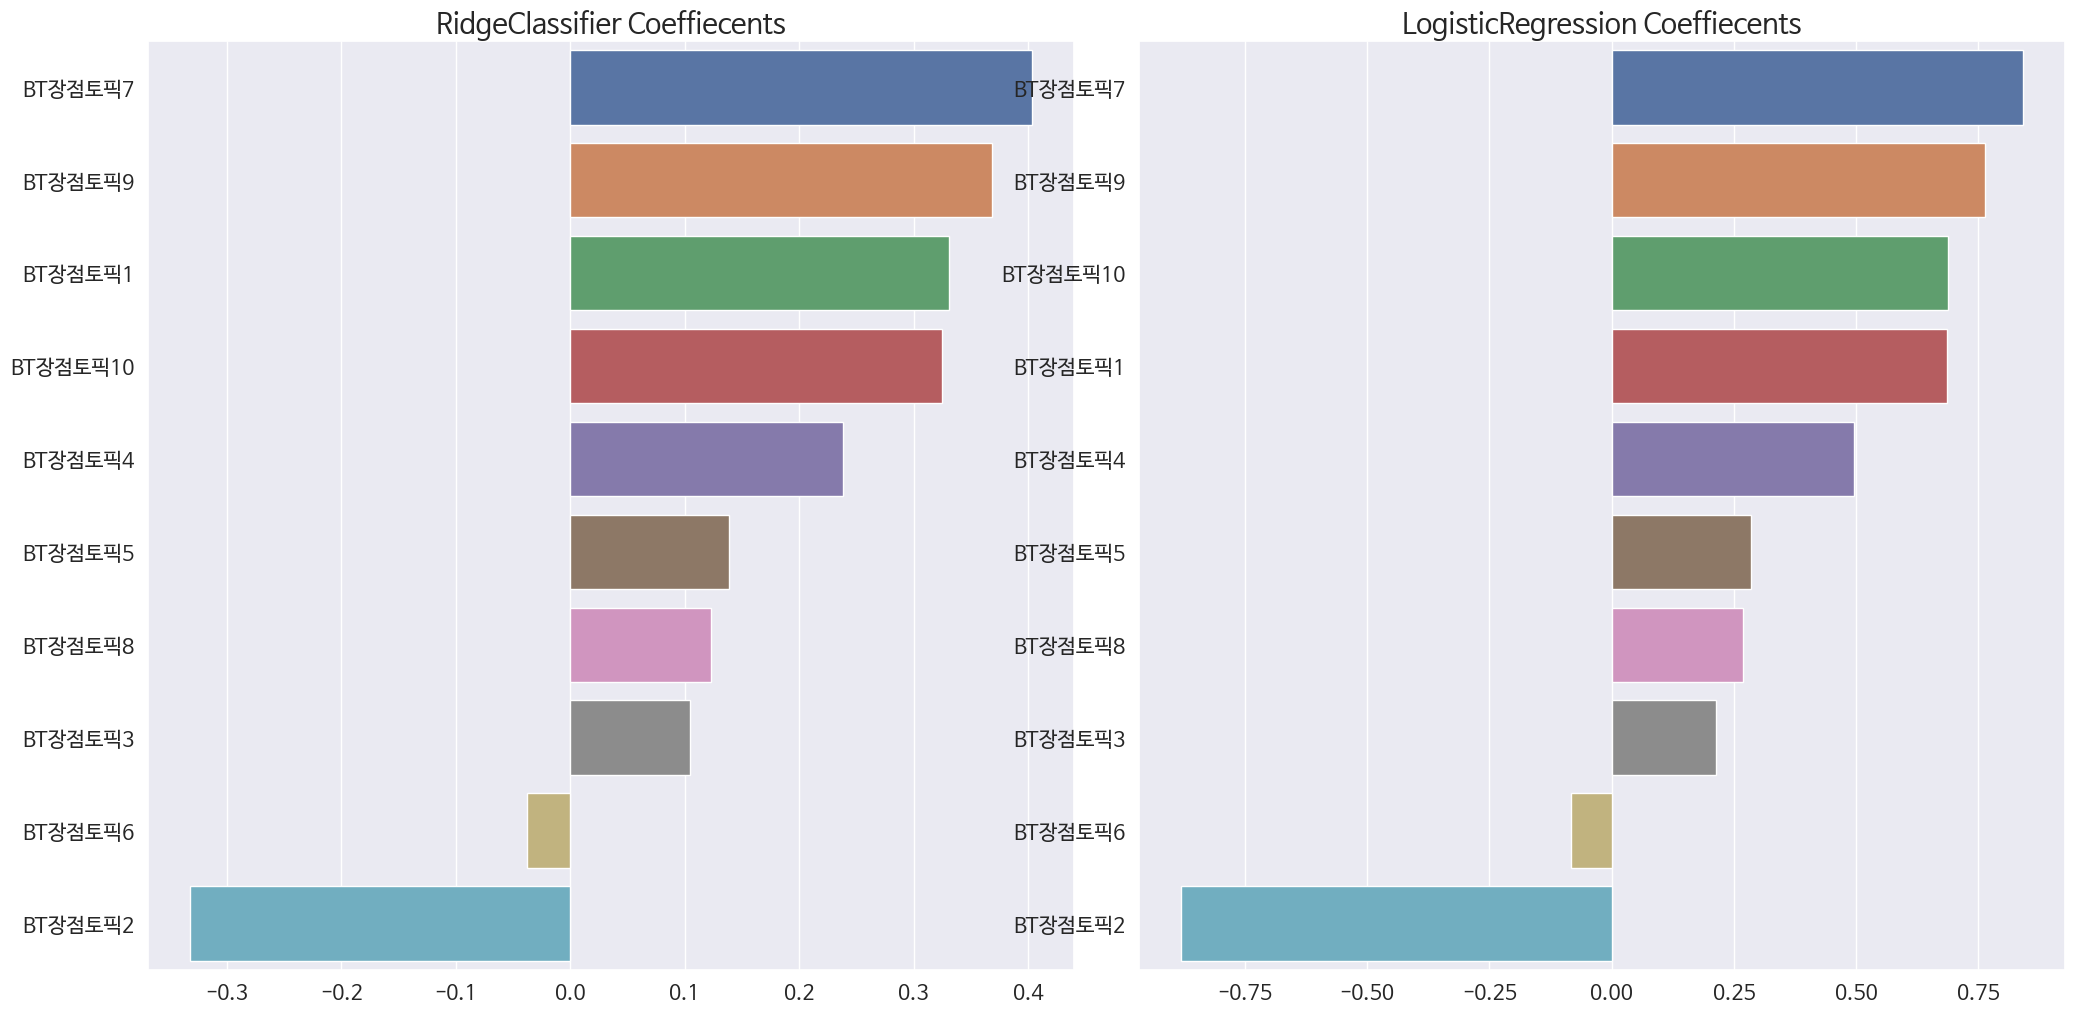

In [ ]:
response_var ='추천여부'
print(f'------------------------ {response_var} -------------------------')

X = df2[feature]
y = df2[response_var]

X_features = df2[feature]
y_target = y

print('\n--------- Ridge ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

# 피처 중요도 및 정렬
feature_importances = ridge_clf.coef_
sorted_idx = np.argsort(feature_importances[0])[::-1]  # 중요도를 기준으로 내림차순으로 정렬한 인덱스

# 중요도가 높은 순서대로 출력
for idx in sorted_idx:
    feature_name = X_train.columns[idx]
    importance = feature_importances[0][idx]
    print(f"{feature_name}: {importance}")

print('\n--------- Lasso  ---------')
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])


# 모델의 회귀 계수 시각화.
models = [ridge_clf, lasso_clf]
visualize_coefficient(models)




--------- Decision Tree ---------
#Decision Tree train set score: 0.648
#Decision Tree test set score: 0.648


,0,variable name
1,0.487344,BT장점토픽2
6,0.166763,BT장점토픽7
7,0.083161,BT장점토픽8
9,0.063527,BT장점토픽10
0,0.058750,BT장점토픽1
5,0.050638,BT장점토픽6
3,0.050291,BT장점토픽4
8,0.027341,BT장점토픽9
4,0.012184,BT장점토픽5
2,0.000000,BT장점토픽3


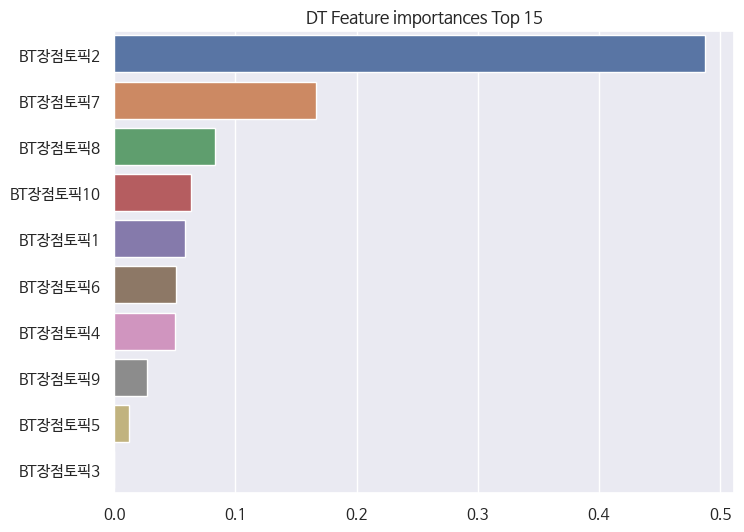



--------- Random Forest ---------
#Random Forest train set score: 0.977
#Random Forest test set score: 0.625


,0,variable name
1,0.111742,BT장점토픽2
9,0.103621,BT장점토픽10
0,0.103528,BT장점토픽1
3,0.100892,BT장점토픽4
6,0.100460,BT장점토픽7
8,0.098882,BT장점토픽9
7,0.097226,BT장점토픽8
2,0.096102,BT장점토픽3
5,0.094751,BT장점토픽6
4,0.092795,BT장점토픽5


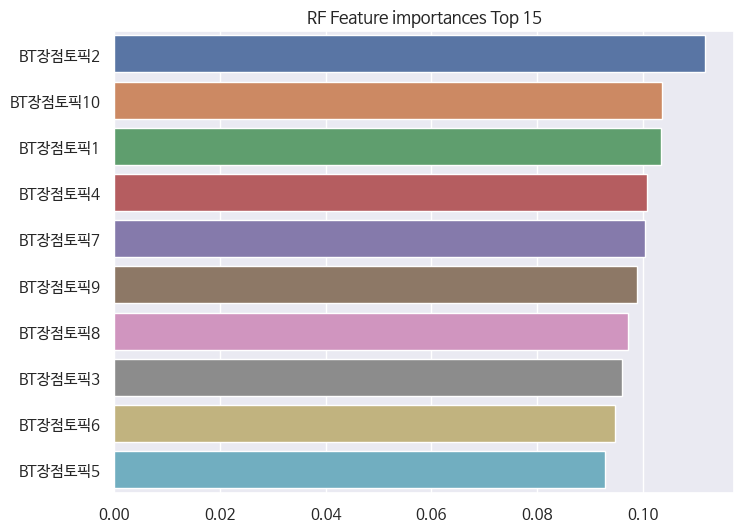



--------- Gradient Boosting ---------
#Gradient Boosting train set score: 0.652
#Gradient Boosting test set score: 0.646


,0,variable name
1,0.369047,BT장점토픽2
9,0.143400,BT장점토픽10
0,0.134476,BT장점토픽1
6,0.087891,BT장점토픽7
5,0.057135,BT장점토픽6
3,0.049498,BT장점토픽4
2,0.045536,BT장점토픽3
4,0.044238,BT장점토픽5
8,0.041841,BT장점토픽9
7,0.026937,BT장점토픽8


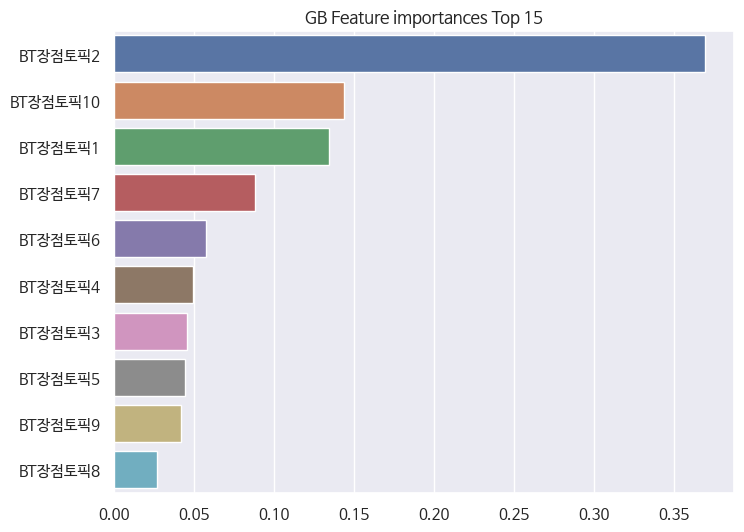

In [ ]:
X = df2[feature]
y = df2[response_var]

X_features = df2[feature]
y_target = y

print('\n\n--------- Decision Tree ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_model.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(dt_model.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(dt_model.score(X_test, y_test)))

#성능확인
result = dt_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('DT Feature importances Top 15')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Random Forest ---------')
rf_best = RandomForestClassifier(random_state = 42)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_train)
print('#Random Forest train set score: {:.3f}'.format(rf_best.score(X_train, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_best.score(X_test, y_test)))

#cv=5 교차 검증
scores = cross_val_score(rf_best, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
result = rf_best.feature_importances_
res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('RF Feature importances Top 15')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Gradient Boosting ---------')
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

#cv=5 교차 검증
scores = cross_val_score(gb_model, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
print('#Gradient Boosting train set score: {:.3f}'.format(gb_model.score(X_train, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb_model.score(X_test, y_test)))

# 특성 중요도 계산
result = gb_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('GB Feature importances Top 15')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
name = pd.DataFrame(ftr_top20).index.to_list()
name.append(response_var)
name

['BT장점토픽2',
 'BT장점토픽10',
 'BT장점토픽1',
 'BT장점토픽7',
 'BT장점토픽6',
 'BT장점토픽4',
 'BT장점토픽3',
 'BT장점토픽5',
 'BT장점토픽9',
 'BT장점토픽8',
 '추천여부']

          BT장점토픽2  BT장점토픽10  BT장점토픽1  BT장점토픽7  BT장점토픽6  BT장점토픽4  BT장점토픽3  BT장점토픽5  BT장점토픽9  BT장점토픽8  추천여부
BT장점토픽2      1.00     -0.16    -0.22    -0.15    -0.02    -0.16    -0.17    -0.08    -0.12    -0.09 -0.11
BT장점토픽10    -0.16      1.00     0.05     0.06    -0.07    -0.01    -0.09    -0.10     0.03     0.01  0.04
BT장점토픽1     -0.22      0.05     1.00     0.06    -0.09    -0.06    -0.18    -0.12     0.06    -0.08  0.08
BT장점토픽7     -0.15      0.06     0.06     1.00    -0.08     0.02    -0.13    -0.11     0.03    -0.03  0.05
BT장점토픽6     -0.02     -0.07    -0.09    -0.08     1.00    -0.08    -0.06     0.00    -0.06    -0.04 -0.02
BT장점토픽4     -0.16     -0.01    -0.06     0.02    -0.08     1.00    -0.12    -0.10    -0.02    -0.07  0.03
BT장점토픽3     -0.17     -0.09    -0.18    -0.13    -0.06    -0.12     1.00    -0.06    -0.07     0.00  0.01
BT장점토픽5     -0.08     -0.10    -0.12    -0.11     0.00    -0.10    -0.06     1.00    -0.08    -0.07  0.00
BT장점토픽9     -0.12      0.03     0.06     0.03 

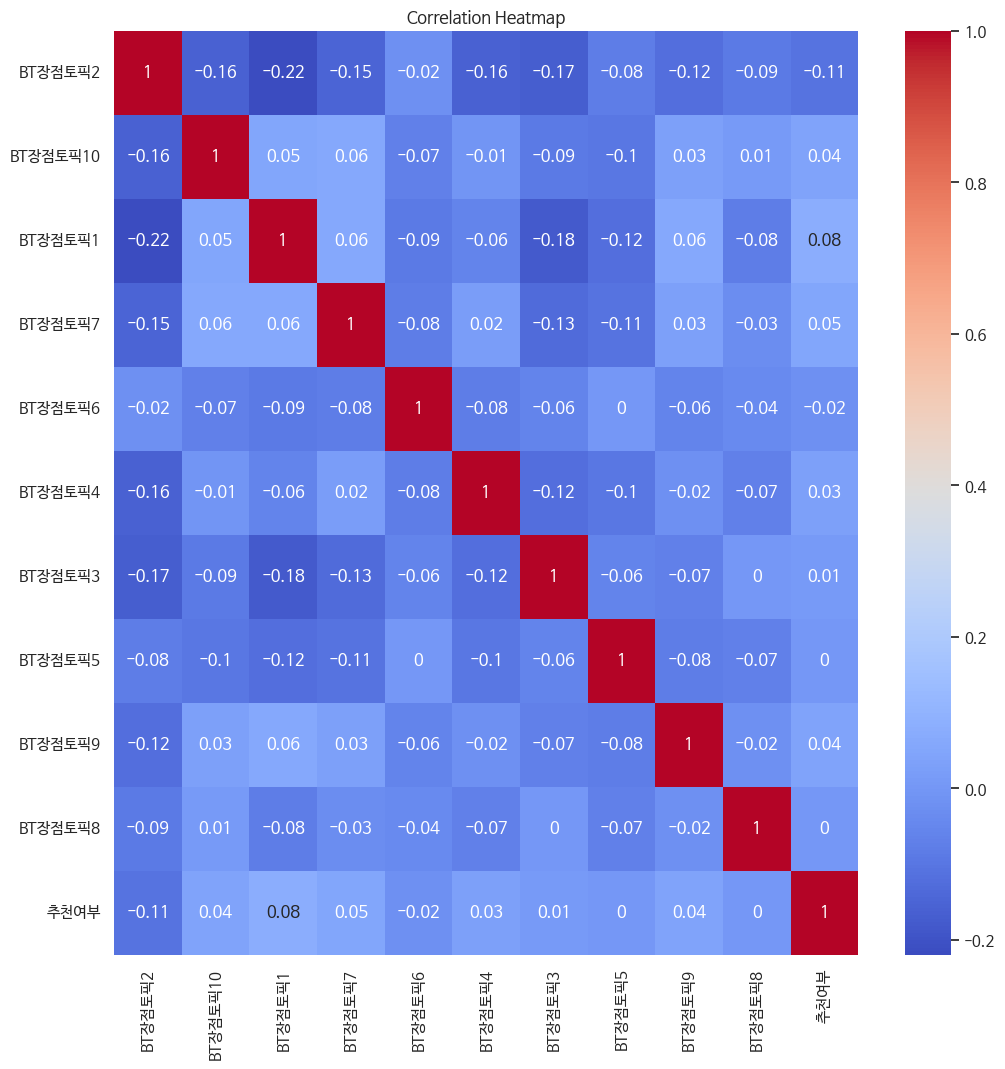

In [ ]:
# 데이터 생성
data = df2[name]
df_cor = pd.DataFrame(data)

# 상관관계 계산
correlation_matrix = df_cor.corr().round(2)

# 결과 출력
print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.yticks(rotation=0)
plt.show()

## IT산업

In [ ]:
feature = ['BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5','BT장점토픽6', 'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10']

------------------------ 추천여부 -------------------------

--------- Ridge ---------
Train set score: 0.595
Test set score: 0.585
Max alpha 9.200 at max validation score 0.601
Train set score: 0.595
Test set score: 0.584
BT장점토픽8: 0.4303608288955858
BT장점토픽1: 0.36503201988375733
BT장점토픽9: 0.35018715659031846
BT장점토픽5: 0.20008569674066967
BT장점토픽7: 0.19632856460064063
BT장점토픽4: 0.12202013875697103
BT장점토픽10: 0.10861770573159314
BT장점토픽3: 0.013488861339207542
BT장점토픽6: -0.16757991281638487
BT장점토픽2: -0.43546895880500536

--------- Lasso  ---------
#Train set score: 0.595
#Test set score: 0.584
#Used features count: 9 out of 10


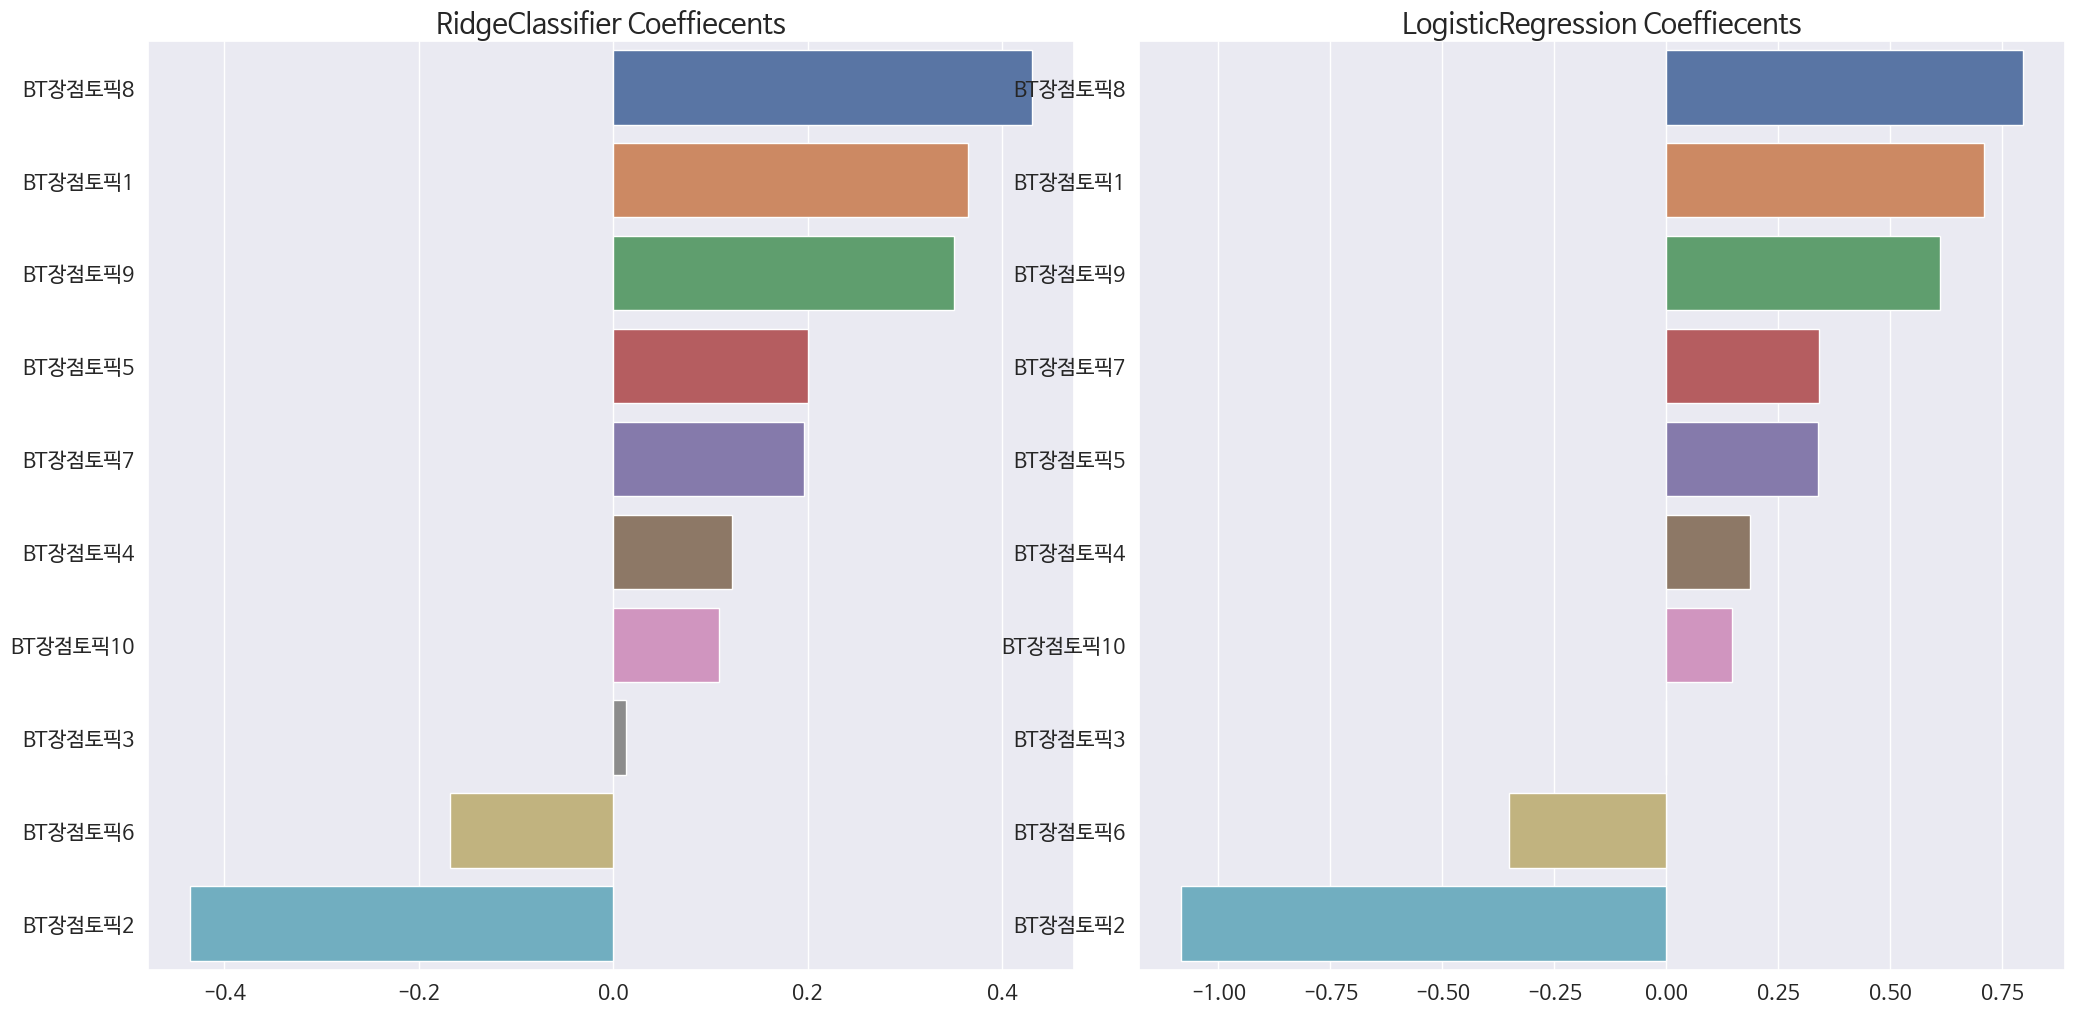

In [ ]:
response_var ='추천여부'
print(f'------------------------ {response_var} -------------------------')

X = df1[feature]
y = df1[response_var]

X_features = df1[feature]
y_target = y

print('\n--------- Ridge ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

# 피처 중요도 및 정렬
feature_importances = ridge_clf.coef_
sorted_idx = np.argsort(feature_importances[0])[::-1]  # 중요도를 기준으로 내림차순으로 정렬한 인덱스

# 중요도가 높은 순서대로 출력
for idx in sorted_idx:
    feature_name = X_train.columns[idx]
    importance = feature_importances[0][idx]
    print(f"{feature_name}: {importance}")

print('\n--------- Lasso  ---------')
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])


# 모델의 회귀 계수 시각화.
models = [ridge_clf, lasso_clf]
visualize_coefficient(models)




--------- Decision Tree ---------
#Decision Tree train set score: 0.624
#Decision Tree test set score: 0.610


,0,variable name
1,0.438730,BT장점토픽2
7,0.155327,BT장점토픽8
0,0.146886,BT장점토픽1
8,0.061199,BT장점토픽9
5,0.058595,BT장점토픽6
3,0.044434,BT장점토픽4
9,0.040103,BT장점토픽10
6,0.022376,BT장점토픽7
4,0.017076,BT장점토픽5
2,0.015275,BT장점토픽3


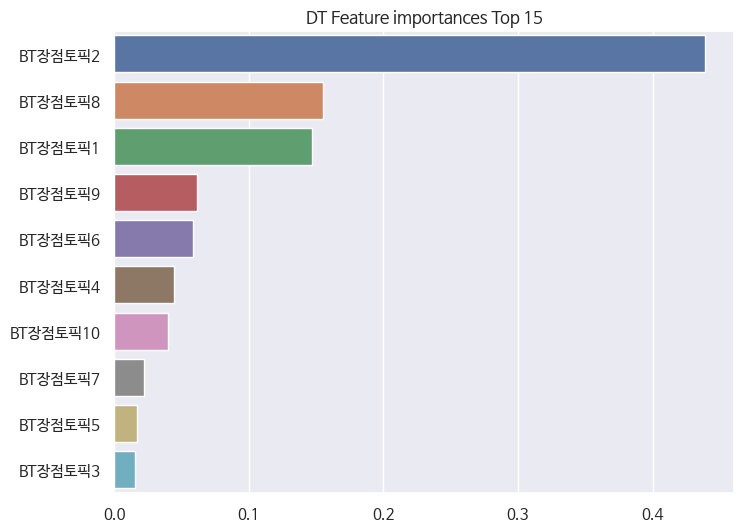



--------- Random Forest ---------
#Random Forest train set score: 0.976
#Random Forest test set score: 0.605


,0,variable name
1,0.112883,BT장점토픽2
0,0.104944,BT장점토픽1
9,0.103163,BT장점토픽10
8,0.101193,BT장점토픽9
3,0.099678,BT장점토픽4
6,0.098796,BT장점토픽7
7,0.098140,BT장점토픽8
5,0.095001,BT장점토픽6
4,0.094423,BT장점토픽5
2,0.091778,BT장점토픽3


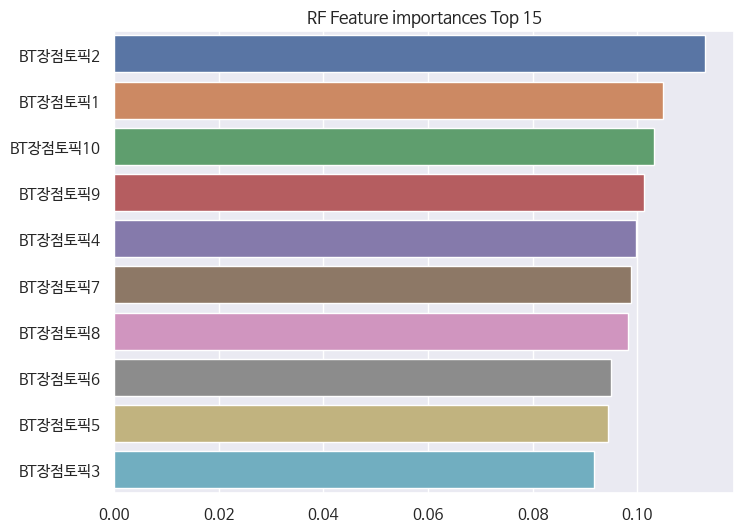



--------- Gradient Boosting ---------
#Gradient Boosting train set score: 0.664
#Gradient Boosting test set score: 0.612


,0,variable name
1,0.239307,BT장점토픽2
0,0.148566,BT장점토픽1
3,0.102701,BT장점토픽4
7,0.098950,BT장점토픽8
8,0.097478,BT장점토픽9
4,0.083914,BT장점토픽5
9,0.070085,BT장점토픽10
6,0.069280,BT장점토픽7
5,0.045469,BT장점토픽6
2,0.044250,BT장점토픽3


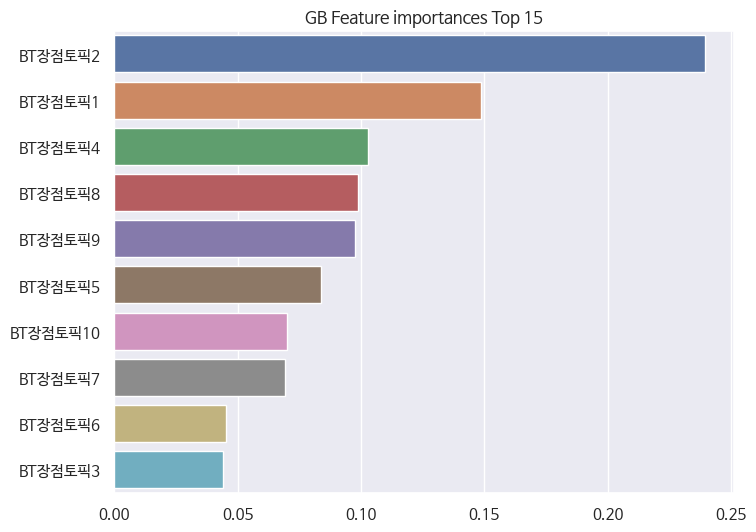

In [ ]:
X = df1[feature]
y = df1[response_var]

X_features = df1[feature]
y_target = y

print('\n\n--------- Decision Tree ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_model.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(dt_model.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(dt_model.score(X_test, y_test)))

#성능확인
result = dt_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('DT Feature importances Top 15')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Random Forest ---------')
rf_best = RandomForestClassifier(random_state = 42)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_train)
print('#Random Forest train set score: {:.3f}'.format(rf_best.score(X_train, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_best.score(X_test, y_test)))

#cv=5 교차 검증
scores = cross_val_score(rf_best, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
result = rf_best.feature_importances_
res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('RF Feature importances Top 15')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Gradient Boosting ---------')
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

#cv=5 교차 검증
scores = cross_val_score(gb_model, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
print('#Gradient Boosting train set score: {:.3f}'.format(gb_model.score(X_train, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb_model.score(X_test, y_test)))

# 특성 중요도 계산
result = gb_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('GB Feature importances Top 15')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
name = pd.DataFrame(ftr_top20).index.to_list()
name.append(response_var)
name

['BT장점토픽2',
 'BT장점토픽1',
 'BT장점토픽4',
 'BT장점토픽8',
 'BT장점토픽9',
 'BT장점토픽5',
 'BT장점토픽10',
 'BT장점토픽7',
 'BT장점토픽6',
 'BT장점토픽3',
 '추천여부']

          BT장점토픽2  BT장점토픽1  BT장점토픽4  BT장점토픽8  BT장점토픽9  BT장점토픽5  BT장점토픽10  BT장점토픽7  BT장점토픽6  BT장점토픽3  추천여부
BT장점토픽2      1.00    -0.22    -0.17    -0.08    -0.12    -0.06     -0.15    -0.16    -0.02    -0.14 -0.12
BT장점토픽1     -0.22     1.00    -0.08    -0.08     0.08    -0.10      0.05    -0.03    -0.10    -0.17  0.09
BT장점토픽4     -0.17    -0.08     1.00    -0.08    -0.03    -0.10     -0.03    -0.04    -0.09    -0.11  0.02
BT장점토픽8     -0.08    -0.08    -0.08     1.00     0.01    -0.06      0.03    -0.07    -0.05     0.03  0.02
BT장점토픽9     -0.12     0.08    -0.03     0.01     1.00    -0.08      0.04    -0.02    -0.07    -0.06  0.04
BT장점토픽5     -0.06    -0.10    -0.10    -0.06    -0.08     1.00     -0.09    -0.10     0.00    -0.04  0.01
BT장점토픽10    -0.15     0.05    -0.03     0.03     0.04    -0.09      1.00    -0.04    -0.07    -0.07  0.03
BT장점토픽7     -0.16    -0.03    -0.04    -0.07    -0.02    -0.10     -0.04     1.00    -0.09    -0.12  0.03
BT장점토픽6     -0.02    -0.10    -0.09    -0.05  

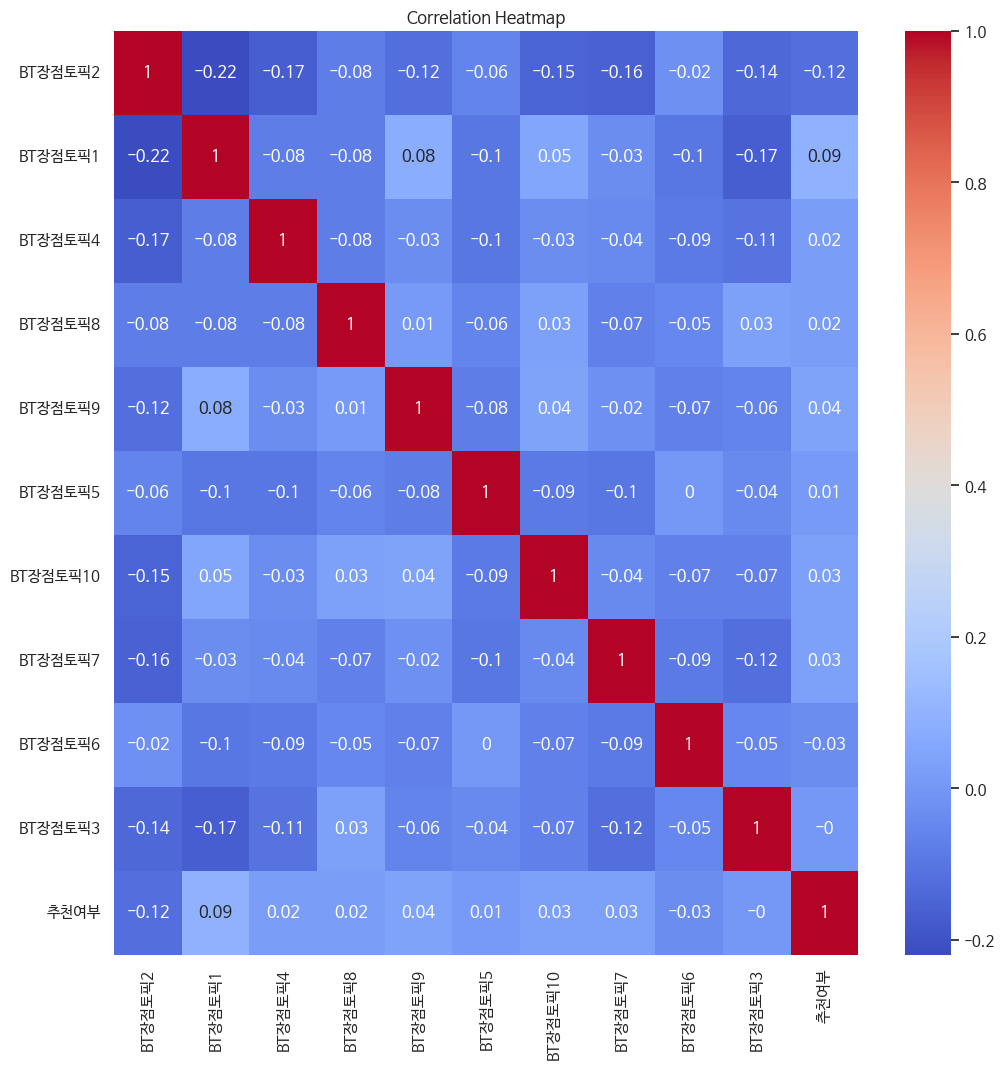

In [ ]:
# 데이터 생성
data = df1[name]
df_cor = pd.DataFrame(data)

# 상관관계 계산
correlation_matrix = df_cor.corr().round(2)

# 결과 출력
print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.yticks(rotation=0)
plt.show()

# 단점

## 전체산업

In [ ]:
feature = ['BT단점토픽1', 'BT단점토픽2','BT단점토픽3', 'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']

------------------------ 추천여부 -------------------------

--------- Ridge ---------
Train set score: 0.642
Test set score: 0.642
Max alpha 1.200 at max validation score 0.643
Train set score: 0.642
Test set score: 0.642
BT단점토픽6: 0.4843066852504652
BT단점토픽3: 0.4667196182837998
BT단점토픽7: 0.2444718303606926
BT단점토픽2: 0.15171739278240406
BT단점토픽4: 0.12019711793559018
BT단점토픽8: 0.05871418341966116
BT단점토픽5: -0.023926152458589617
BT단점토픽1: -0.6730768969155508

--------- Lasso  ---------
#Train set score: 0.642
#Test set score: 0.642
#Used features count: 8 out of 8


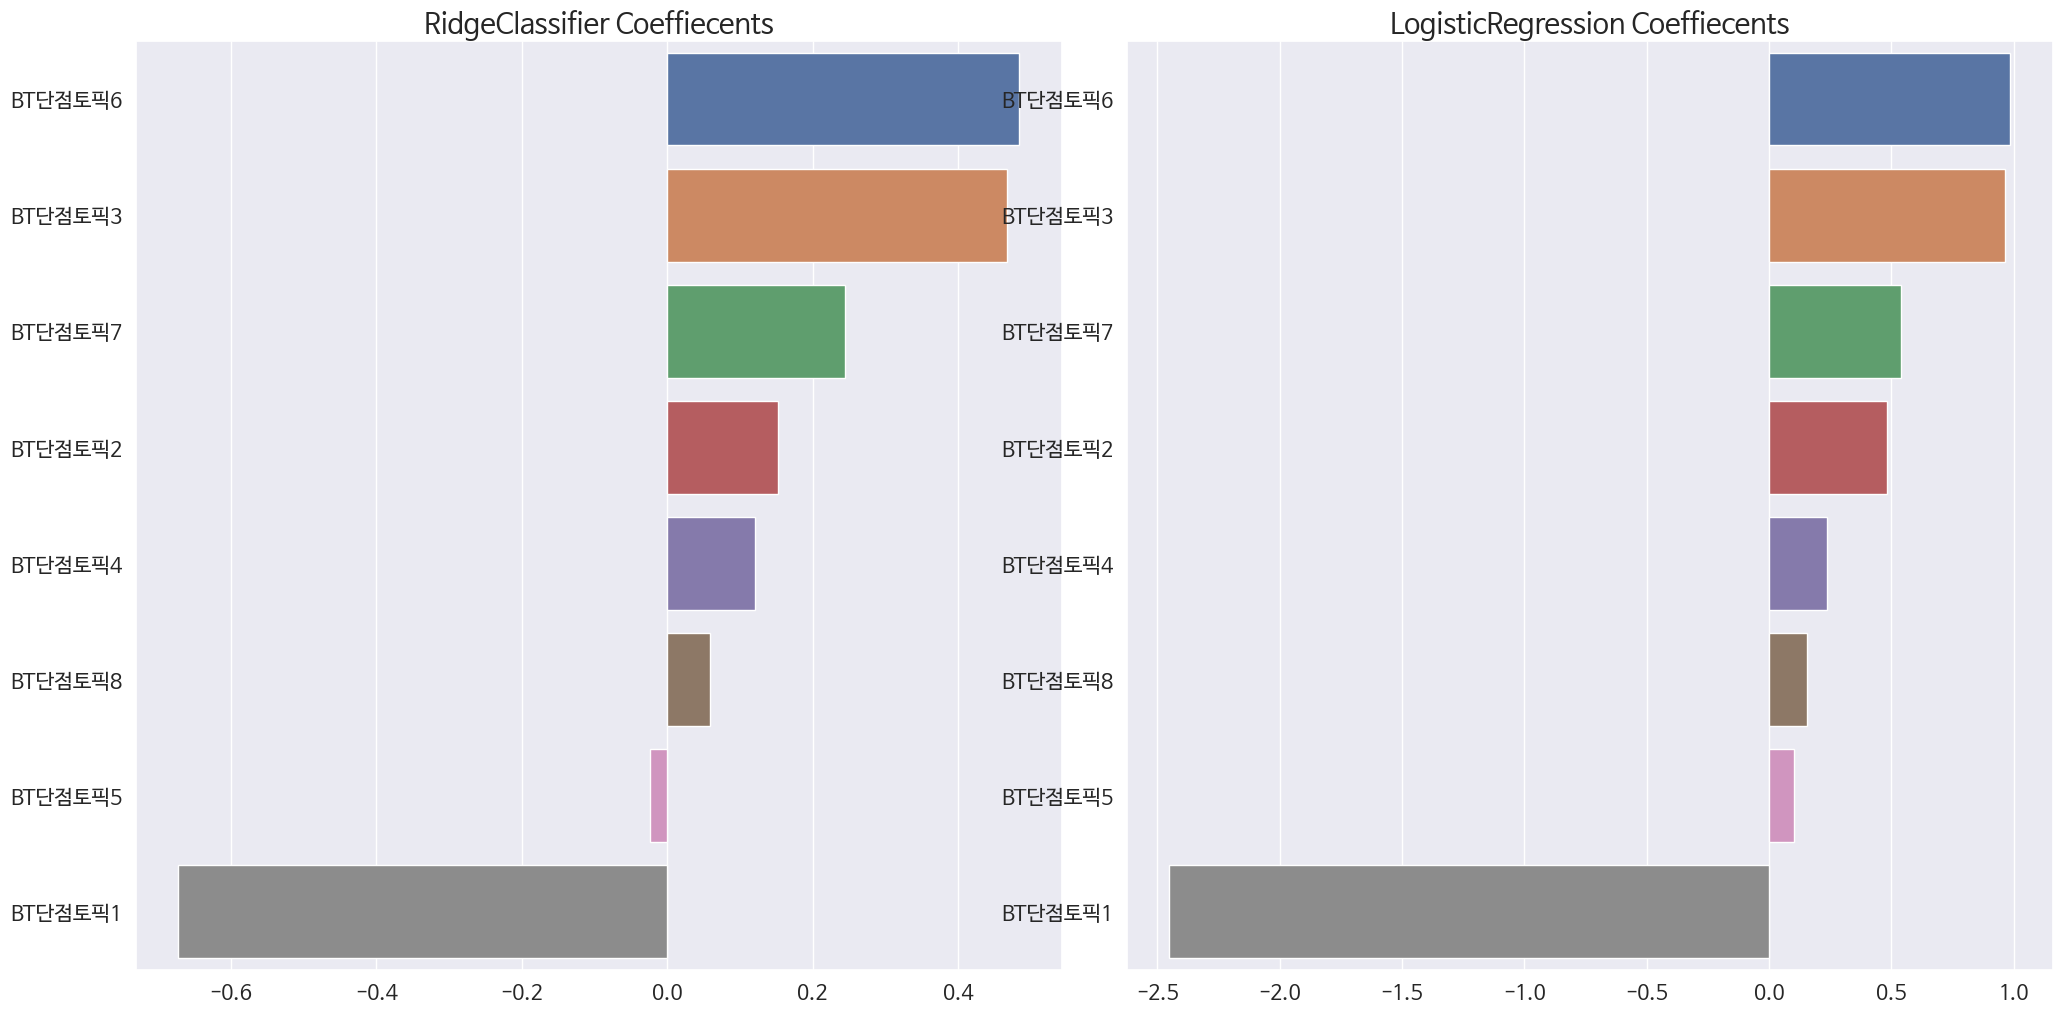

In [ ]:
response_var ='추천여부'
print(f'------------------------ {response_var} -------------------------')

X = df2[feature]
y = df2[response_var]

X_features = df2[feature]
y_target = y

print('\n--------- Ridge ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

# 피처 중요도 및 정렬
feature_importances = ridge_clf.coef_
sorted_idx = np.argsort(feature_importances[0])[::-1]  # 중요도를 기준으로 내림차순으로 정렬한 인덱스

# 중요도가 높은 순서대로 출력
for idx in sorted_idx:
    feature_name = X_train.columns[idx]
    importance = feature_importances[0][idx]
    print(f"{feature_name}: {importance}")

print('\n--------- Lasso  ---------')
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])


# 모델의 회귀 계수 시각화.
models = [ridge_clf, lasso_clf]
visualize_coefficient(models)




--------- Decision Tree ---------
#Decision Tree train set score: 0.645
#Decision Tree test set score: 0.642


,0,variable name
2,0.216283,BT단점토픽3
7,0.216231,BT단점토픽8
0,0.193748,BT단점토픽1
4,0.134724,BT단점토픽5
1,0.122161,BT단점토픽2
3,0.059440,BT단점토픽4
5,0.048098,BT단점토픽6
6,0.009315,BT단점토픽7


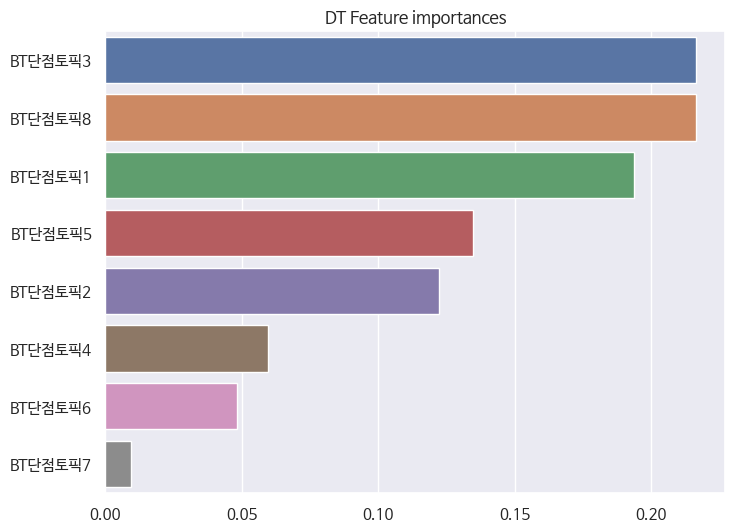



--------- Random Forest ---------
#Random Forest train set score: 0.979
#Random Forest test set score: 0.623


,0,variable name
0,0.131037,BT단점토픽1
2,0.129920,BT단점토픽3
1,0.127109,BT단점토픽2
4,0.124655,BT단점토픽5
5,0.122805,BT단점토픽6
7,0.122586,BT단점토픽8
6,0.121663,BT단점토픽7
3,0.120226,BT단점토픽4


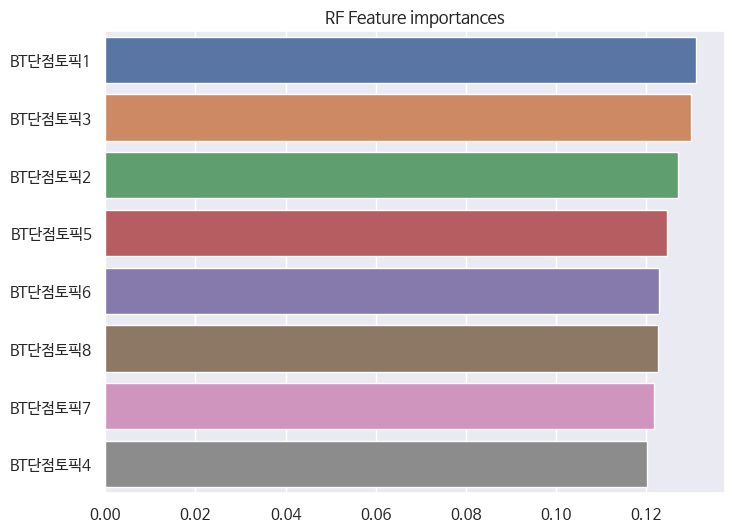



--------- Gradient Boosting ---------
#Gradient Boosting train set score: 0.645
#Gradient Boosting test set score: 0.643


,0,variable name
0,0.190818,BT단점토픽1
1,0.189553,BT단점토픽2
7,0.167618,BT단점토픽8
2,0.151056,BT단점토픽3
4,0.142443,BT단점토픽5
6,0.062001,BT단점토픽7
5,0.048295,BT단점토픽6
3,0.048215,BT단점토픽4


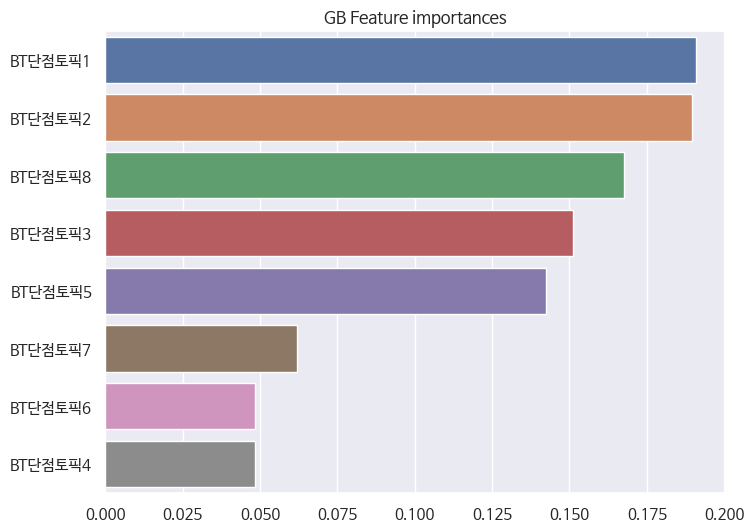

In [ ]:
X = df2[feature]
y = df2[response_var]

X_features = df2[feature]
y_target = y

print('\n\n--------- Decision Tree ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_model.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(dt_model.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(dt_model.score(X_test, y_test)))

#성능확인
result = dt_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('DT Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Random Forest ---------')
rf_best = RandomForestClassifier(random_state = 42)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_train)
print('#Random Forest train set score: {:.3f}'.format(rf_best.score(X_train, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_best.score(X_test, y_test)))

#cv=5 교차 검증
scores = cross_val_score(rf_best, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
result = rf_best.feature_importances_
res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('RF Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Gradient Boosting ---------')
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

#cv=5 교차 검증
scores = cross_val_score(gb_model, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
print('#Gradient Boosting train set score: {:.3f}'.format(gb_model.score(X_train, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb_model.score(X_test, y_test)))

# 특성 중요도 계산
result = gb_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('GB Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
name = pd.DataFrame(ftr_top20).index.to_list()
name.append(response_var)
name

['BT단점토픽1',
 'BT단점토픽2',
 'BT단점토픽8',
 'BT단점토픽3',
 'BT단점토픽5',
 'BT단점토픽7',
 'BT단점토픽6',
 'BT단점토픽4',
 '추천여부']

         BT단점토픽1  BT단점토픽2  BT단점토픽8  BT단점토픽3  BT단점토픽5  BT단점토픽7  BT단점토픽6  BT단점토픽4  추천여부
BT단점토픽1     1.00     0.21     0.10     0.03     0.21     0.09     0.02    -0.33 -0.04
BT단점토픽2     0.21     1.00     0.14     0.08     0.27     0.12     0.05    -0.39 -0.00
BT단점토픽8     0.10     0.14     1.00     0.01     0.21     0.24     0.08    -0.47 -0.00
BT단점토픽3     0.03     0.08     0.01     1.00     0.06     0.00    -0.03    -0.47  0.03
BT단점토픽5     0.21     0.27     0.21     0.06     1.00     0.17     0.11    -0.46 -0.01
BT단점토픽7     0.09     0.12     0.24     0.00     0.17     1.00     0.06    -0.43  0.00
BT단점토픽6     0.02     0.05     0.08    -0.03     0.11     0.06     1.00    -0.47  0.03
BT단점토픽4    -0.33    -0.39    -0.47    -0.47    -0.46    -0.43    -0.47     1.00 -0.01
추천여부       -0.04    -0.00    -0.00     0.03    -0.01     0.00     0.03    -0.01  1.00


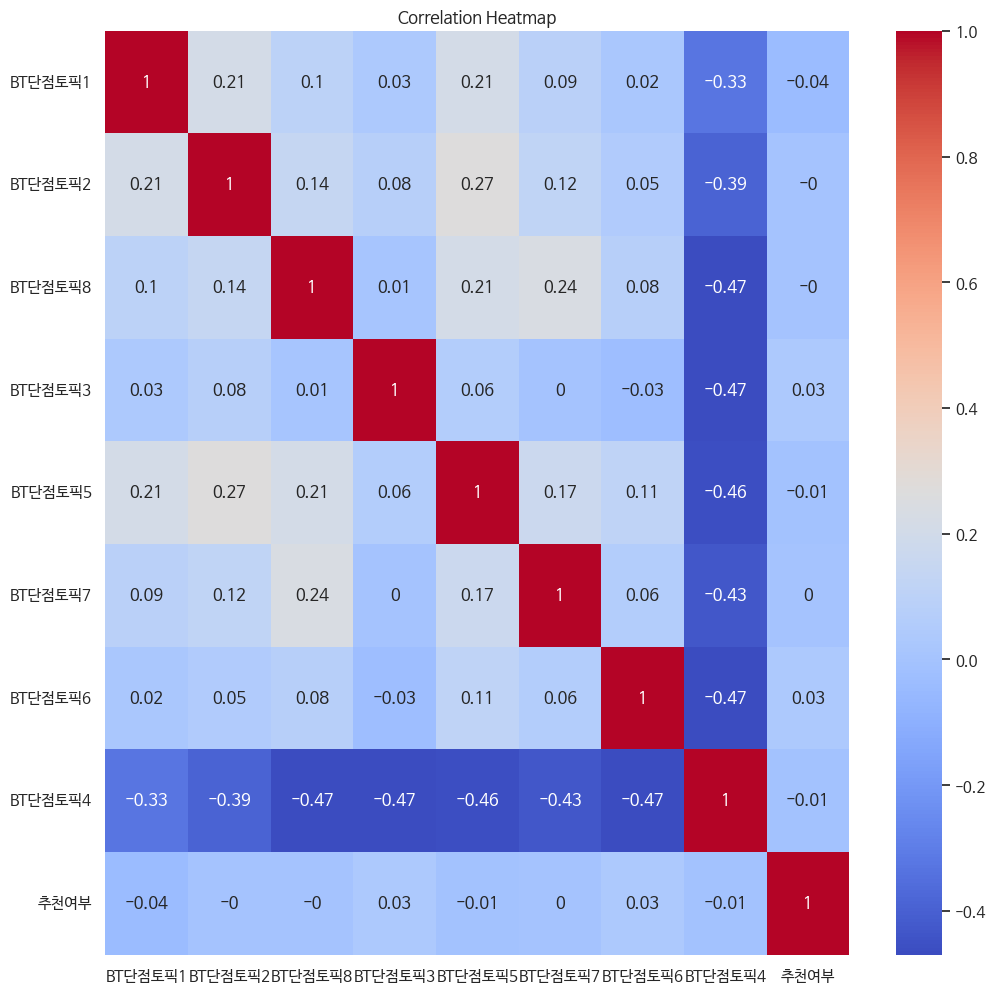

In [ ]:
# 데이터 생성
data = df2[name]
df_cor = pd.DataFrame(data)

# 상관관계 계산
correlation_matrix = df_cor.corr().round(2)

# 결과 출력
print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.yticks(rotation=0)
plt.show()

## IT산업

In [ ]:
feature = ['BT단점토픽1', 'BT단점토픽2','BT단점토픽3', 'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']

------------------------ 추천여부 -------------------------

--------- Ridge ---------
Train set score: 0.601
Test set score: 0.586
Max alpha 1.600 at max validation score 0.606
Train set score: 0.601
Test set score: 0.586
BT단점토픽6: 0.6099691683362479
BT단점토픽3: 0.4029860311340964
BT단점토픽1: 0.32850911651124404
BT단점토픽5: 0.32688459276657167
BT단점토픽7: 0.2721831292127089
BT단점토픽8: 0.12268448181617572
BT단점토픽4: 0.07542232191083689
BT단점토픽2: -0.8295274084655471

--------- Lasso  ---------
#Train set score: 0.600
#Test set score: 0.585
#Used features count: 5 out of 8


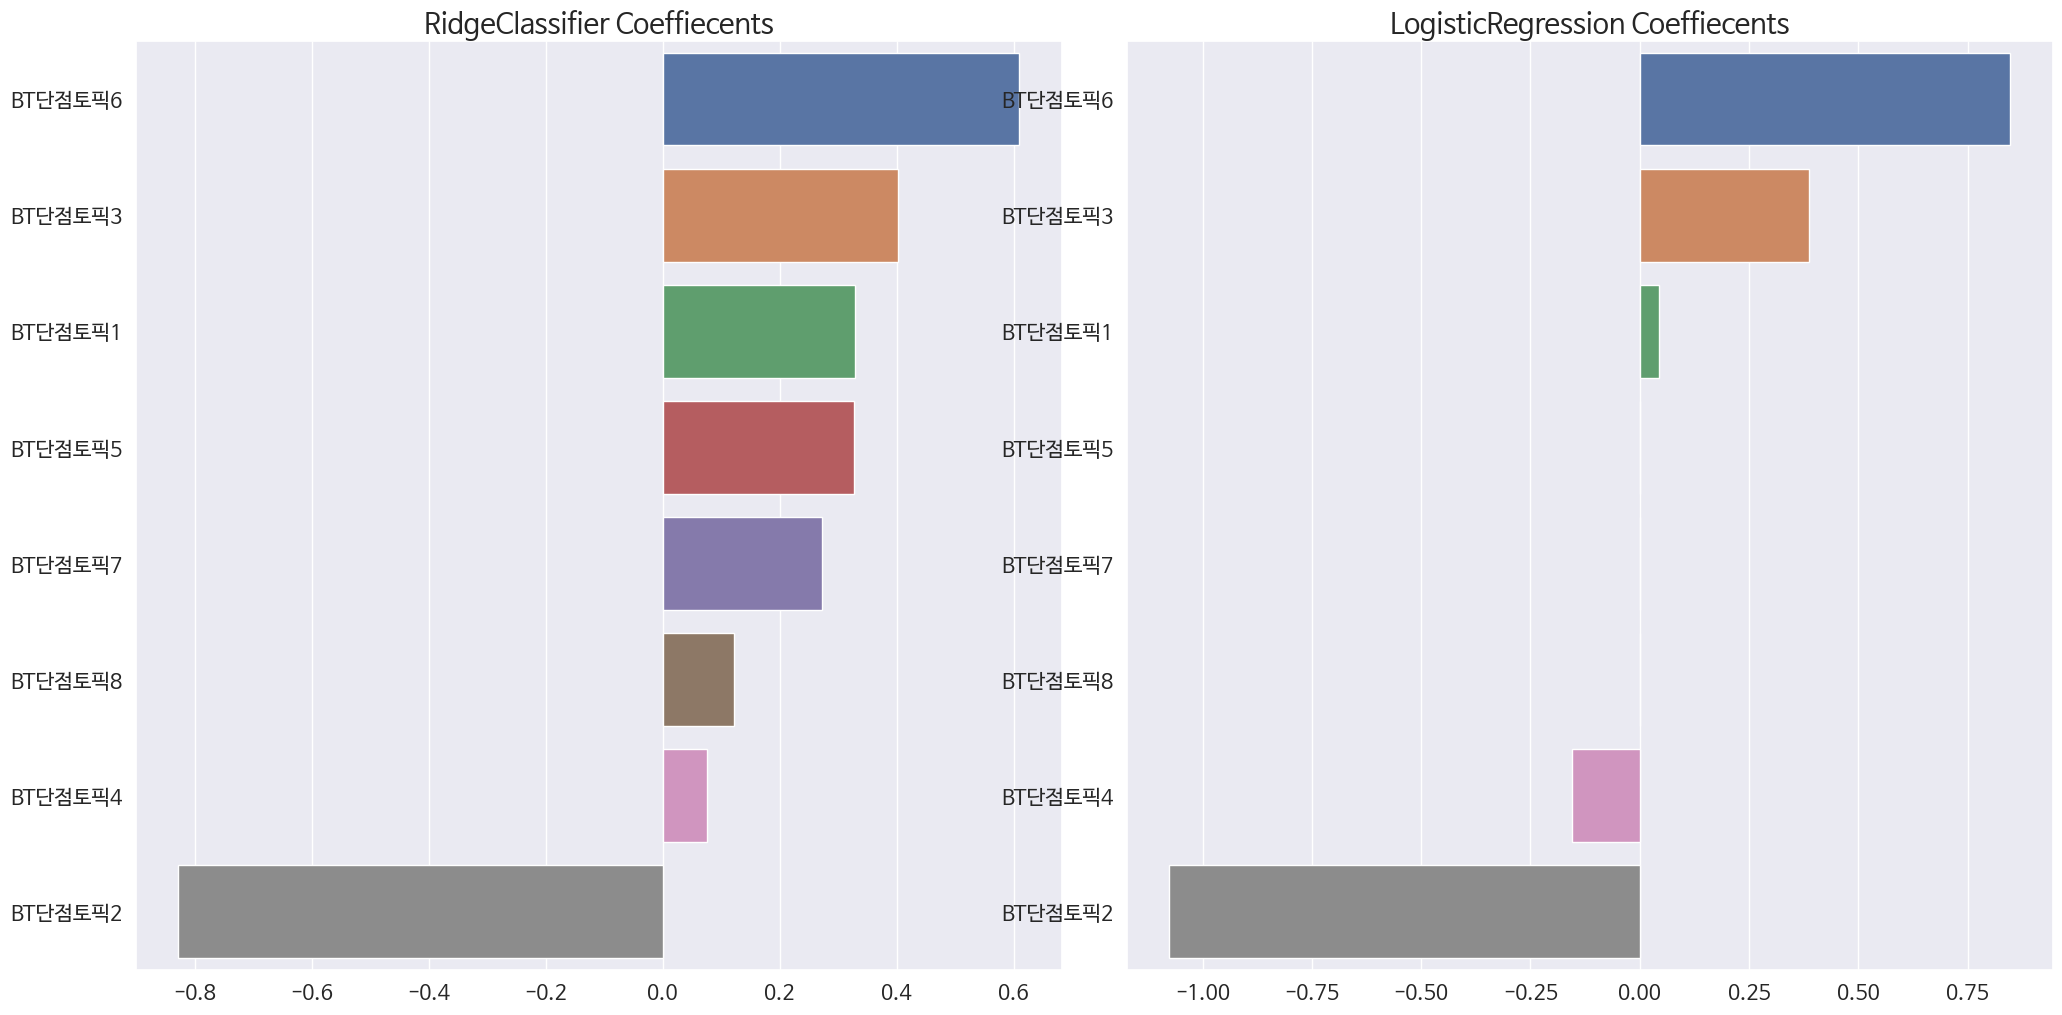

In [ ]:
response_var ='추천여부'
print(f'------------------------ {response_var} -------------------------')

X = df1[feature]
y = df1[response_var]

X_features = df1[feature]
y_target = y

print('\n--------- Ridge ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

# 피처 중요도 및 정렬
feature_importances = ridge_clf.coef_
sorted_idx = np.argsort(feature_importances[0])[::-1]  # 중요도를 기준으로 내림차순으로 정렬한 인덱스

# 중요도가 높은 순서대로 출력
for idx in sorted_idx:
    feature_name = X_train.columns[idx]
    importance = feature_importances[0][idx]
    print(f"{feature_name}: {importance}")

print('\n--------- Lasso  ---------')
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])


# 모델의 회귀 계수 시각화.
models = [ridge_clf, lasso_clf]
visualize_coefficient(models)




--------- Decision Tree ---------
#Decision Tree train set score: 0.611
#Decision Tree test set score: 0.586


,0,variable name
0,0.227157,BT단점토픽1
6,0.161560,BT단점토픽7
4,0.138015,BT단점토픽5
2,0.121773,BT단점토픽3
7,0.118055,BT단점토픽8
1,0.109698,BT단점토픽2
5,0.065610,BT단점토픽6
3,0.058133,BT단점토픽4


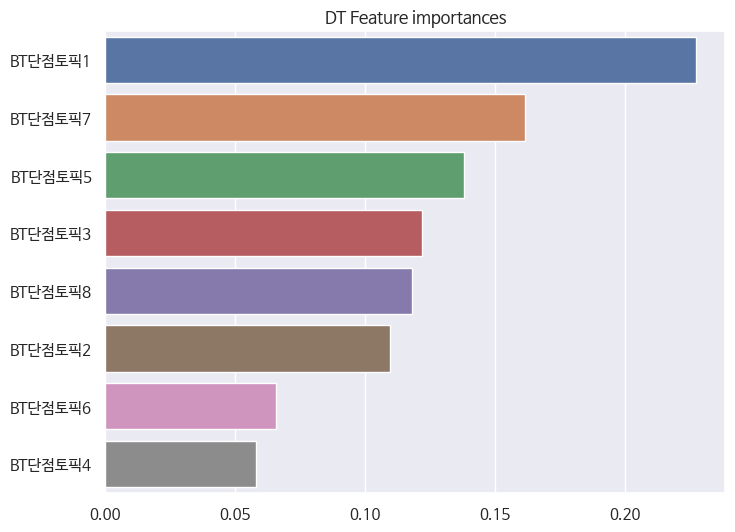



--------- Random Forest ---------
#Random Forest train set score: 0.983
#Random Forest test set score: 0.587


,0,variable name
0,0.130368,BT단점토픽1
1,0.129332,BT단점토픽2
2,0.127465,BT단점토픽3
4,0.124871,BT단점토픽5
5,0.123970,BT단점토픽6
7,0.122313,BT단점토픽8
3,0.121184,BT단점토픽4
6,0.120497,BT단점토픽7


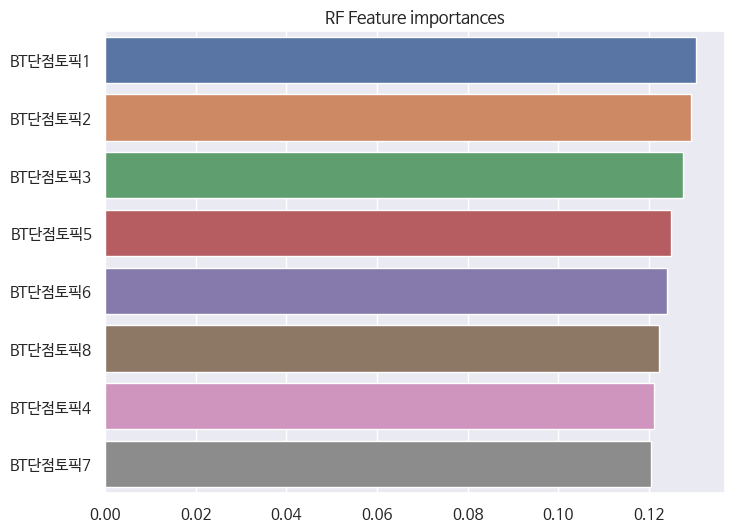



--------- Gradient Boosting ---------
#Gradient Boosting train set score: 0.632
#Gradient Boosting test set score: 0.584


,0,variable name
1,0.179619,BT단점토픽2
0,0.170437,BT단점토픽1
2,0.126169,BT단점토픽3
7,0.123492,BT단점토픽8
4,0.113556,BT단점토픽5
5,0.100502,BT단점토픽6
3,0.098924,BT단점토픽4
6,0.087301,BT단점토픽7


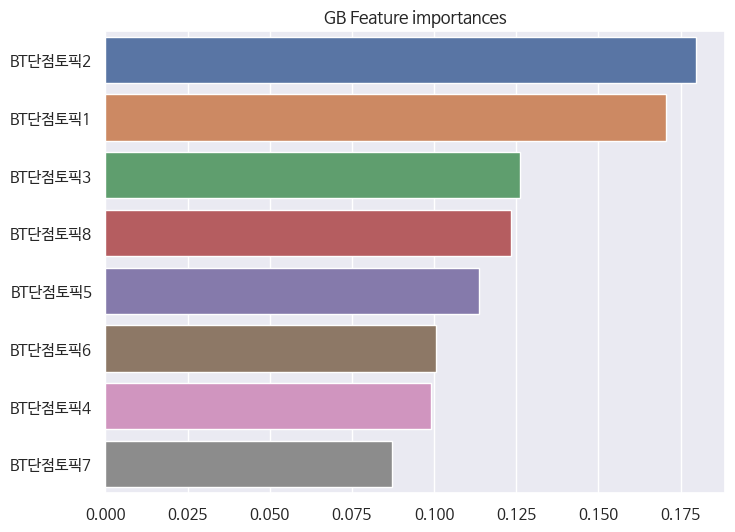

In [ ]:
X = df1[feature]
y = df1[response_var]

X_features = df1[feature]
y_target = y

print('\n\n--------- Decision Tree ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_model.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(dt_model.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(dt_model.score(X_test, y_test)))

#성능확인
result = dt_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('DT Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Random Forest ---------')
rf_best = RandomForestClassifier(random_state = 42)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_train)
print('#Random Forest train set score: {:.3f}'.format(rf_best.score(X_train, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_best.score(X_test, y_test)))

#cv=5 교차 검증
scores = cross_val_score(rf_best, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
result = rf_best.feature_importances_
res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('RF Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Gradient Boosting ---------')
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

#cv=5 교차 검증
scores = cross_val_score(gb_model, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
print('#Gradient Boosting train set score: {:.3f}'.format(gb_model.score(X_train, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb_model.score(X_test, y_test)))

# 특성 중요도 계산
result = gb_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('GB Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
name = pd.DataFrame(ftr_top20).index.to_list()
name.append(response_var)
name

['BT단점토픽2',
 'BT단점토픽1',
 'BT단점토픽3',
 'BT단점토픽8',
 'BT단점토픽5',
 'BT단점토픽6',
 'BT단점토픽4',
 'BT단점토픽7',
 '추천여부']

         BT단점토픽2  BT단점토픽1  BT단점토픽3  BT단점토픽8  BT단점토픽5  BT단점토픽6  BT단점토픽4  BT단점토픽7  추천여부
BT단점토픽2     1.00     0.47     0.32     0.25     0.62     0.19    -0.60     0.27 -0.00
BT단점토픽1     0.47     1.00     0.14     0.14     0.34     0.09    -0.43     0.15  0.00
BT단점토픽3     0.32     0.14     1.00     0.06     0.20     0.04    -0.51     0.07  0.02
BT단점토픽8     0.25     0.14     0.06     1.00     0.26     0.13    -0.54     0.28  0.00
BT단점토픽5     0.62     0.34     0.20     0.26     1.00     0.21    -0.58     0.26  0.02
BT단점토픽6     0.19     0.09     0.04     0.13     0.21     1.00    -0.52     0.12  0.03
BT단점토픽4    -0.60    -0.43    -0.51    -0.54    -0.58    -0.52     1.00    -0.50 -0.02
BT단점토픽7     0.27     0.15     0.07     0.28     0.26     0.12    -0.50     1.00  0.02
추천여부       -0.00     0.00     0.02     0.00     0.02     0.03    -0.02     0.02  1.00


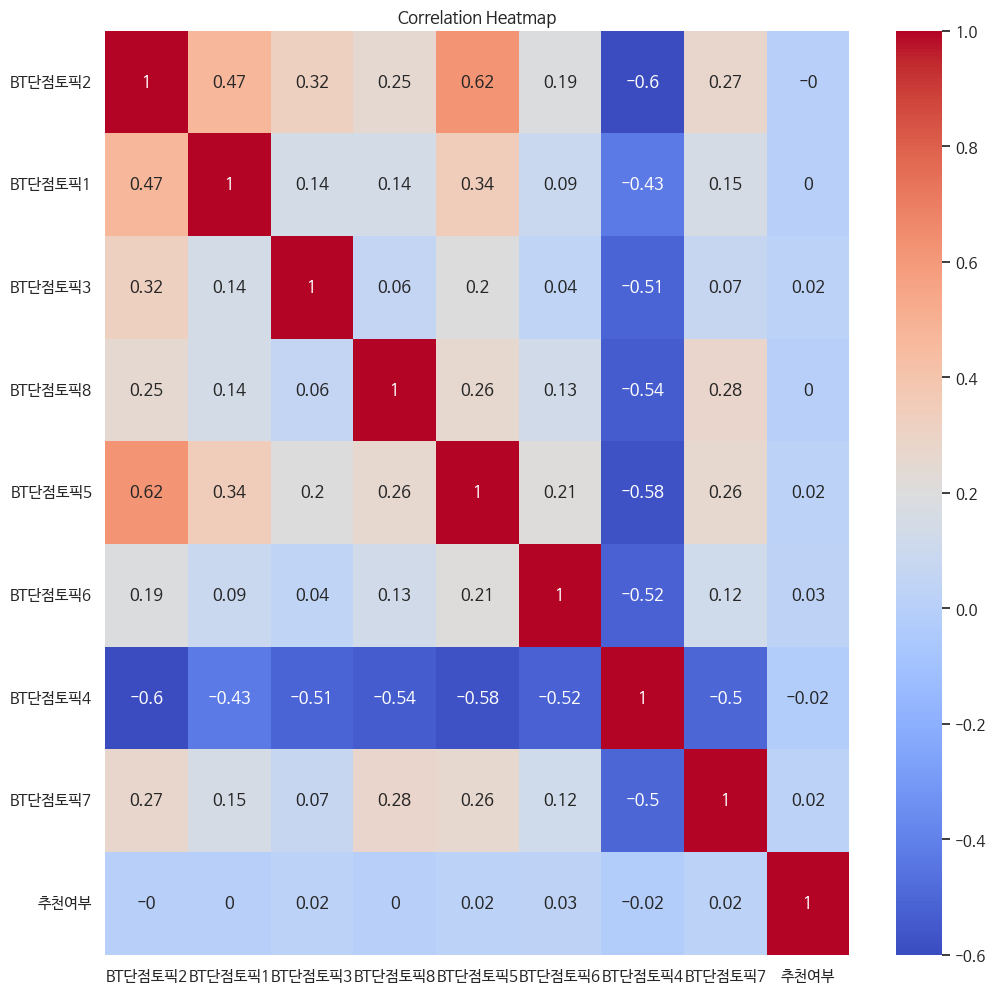

In [ ]:
# 데이터 생성
data = df1[name]
df_cor = pd.DataFrame(data)

# 상관관계 계산
correlation_matrix = df_cor.corr().round(2)

# 결과 출력
print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.yticks(rotation=0)
plt.show()

# 장점+단점

## 전체산업

In [ ]:
feature = ['BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5', 'BT장점토픽6',
           'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10', 'BT단점토픽1', 'BT단점토픽2',
           'BT단점토픽3', 'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']

------------------------ 추천여부 -------------------------

--------- Ridge ---------
Train set score: 0.642
Test set score: 0.643
Max alpha 5.600 at max validation score 0.644
Train set score: 0.642
Test set score: 0.643
BT단점토픽6: 0.47406790607631594
BT단점토픽3: 0.41727527184538504
BT장점토픽7: 0.4013503041683194
BT단점토픽7: 0.3869122359834889
BT장점토픽9: 0.36570742603985607
BT장점토픽1: 0.32975158507673086
BT장점토픽10: 0.31986962250833817
BT단점토픽8: 0.24956243551235746
BT장점토픽4: 0.23800600822422177
BT장점토픽8: 0.13387284950370282
BT단점토픽4: 0.12392962606602988
BT장점토픽5: 0.11879340008443304
BT장점토픽3: 0.10948824707284172
BT단점토픽2: 0.05642290920237286
BT단점토픽5: -0.03519252739628712
BT장점토픽6: -0.0445520697386045
BT장점토픽2: -0.33942293030817994
BT단점토픽1: -0.7268877474146018

--------- Lasso  ---------
#Train set score: 0.642
#Test set score: 0.642
#Used features count: 18 out of 18


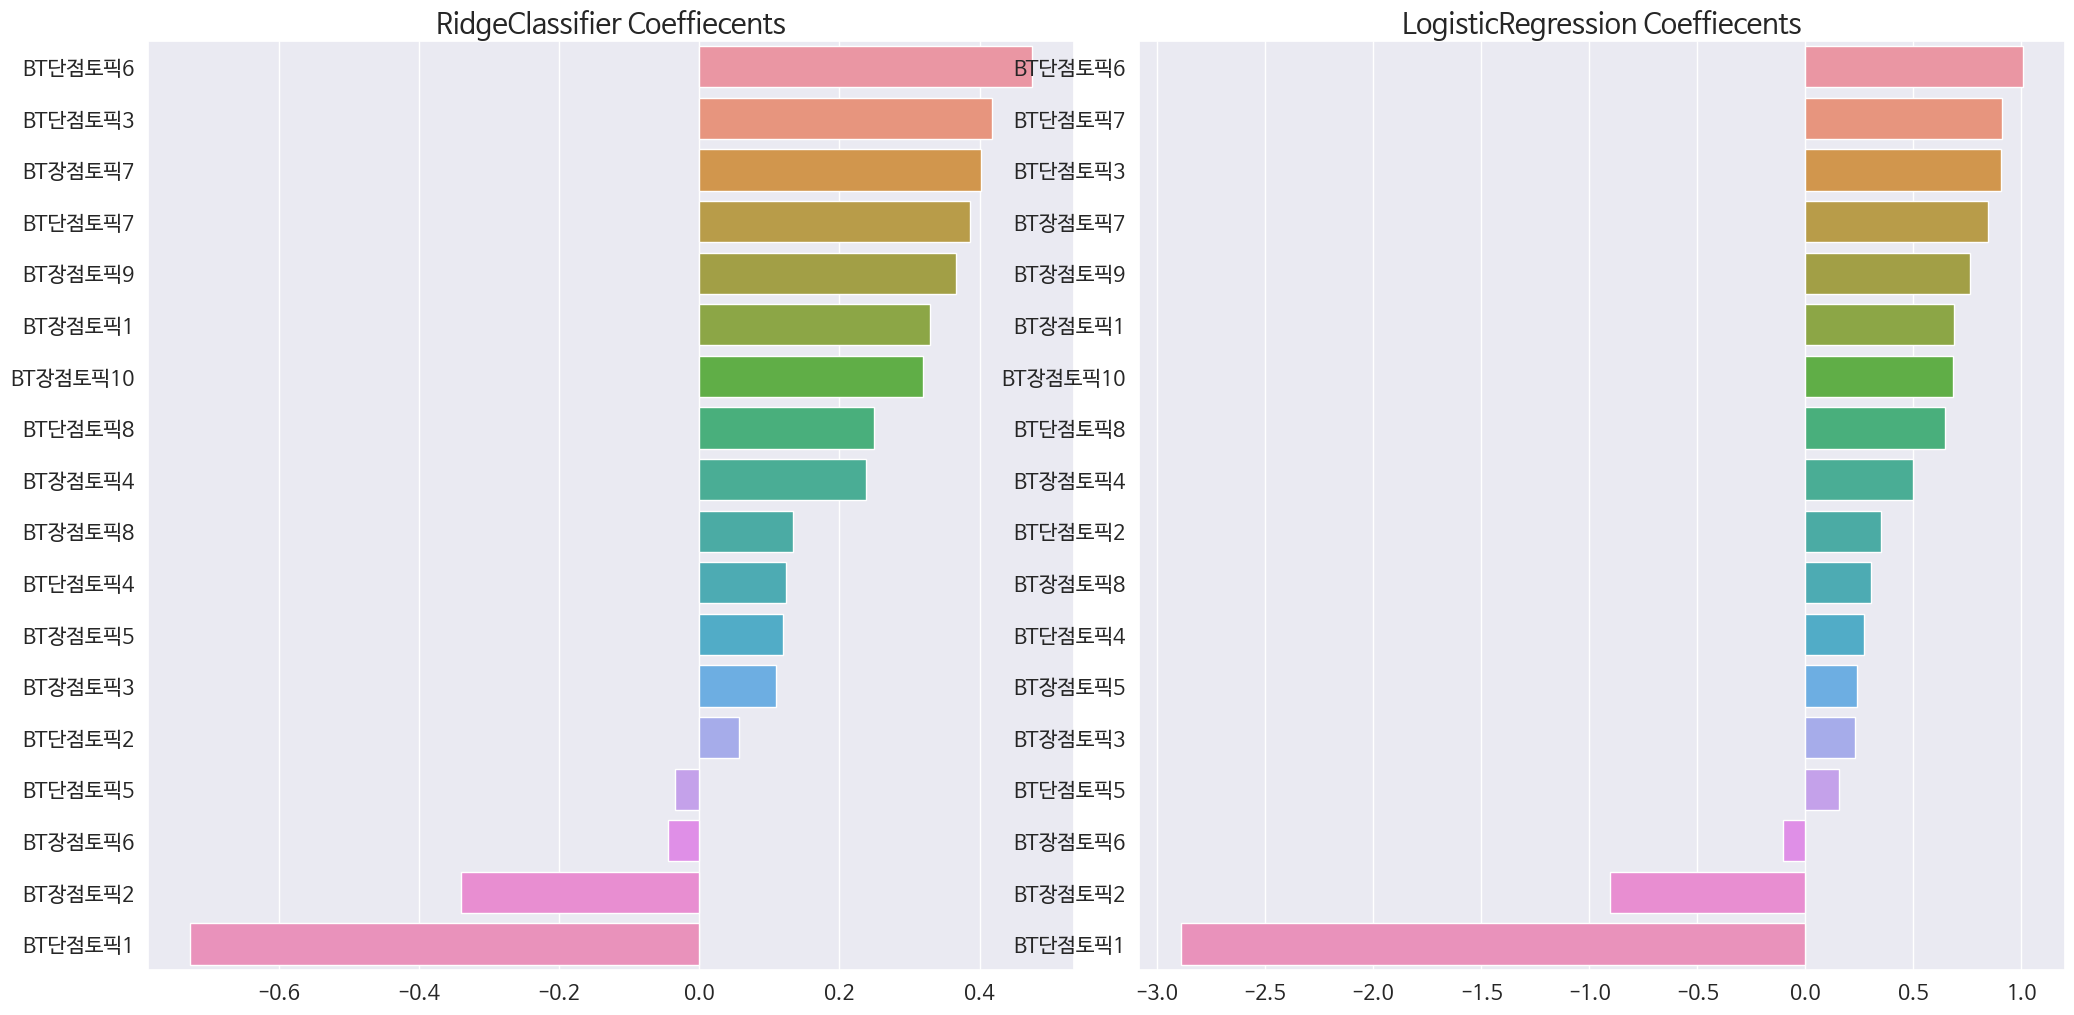

In [ ]:
response_var ='추천여부'
print(f'------------------------ {response_var} -------------------------')

X = df2[feature]
y = df2[response_var]

X_features = df2[feature]
y_target = y

print('\n--------- Ridge ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

# 피처 중요도 및 정렬
feature_importances = ridge_clf.coef_
sorted_idx = np.argsort(feature_importances[0])[::-1]  # 중요도를 기준으로 내림차순으로 정렬한 인덱스

# 중요도가 높은 순서대로 출력
for idx in sorted_idx:
    feature_name = X_train.columns[idx]
    importance = feature_importances[0][idx]
    print(f"{feature_name}: {importance}")

print('\n--------- Lasso  ---------')
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])


# 모델의 회귀 계수 시각화.
models = [ridge_clf, lasso_clf]
visualize_coefficient(models)




--------- Decision Tree ---------
#Decision Tree train set score: 0.648
#Decision Tree test set score: 0.644


,0,variable name
1,0.395783,BT장점토픽2
6,0.130716,BT장점토픽7
10,0.110097,BT단점토픽1
7,0.068134,BT장점토픽8
11,0.063142,BT단점토픽2
12,0.053357,BT단점토픽3
9,0.049375,BT장점토픽10
16,0.029298,BT단점토픽7
3,0.029175,BT장점토픽4
17,0.024056,BT단점토픽8


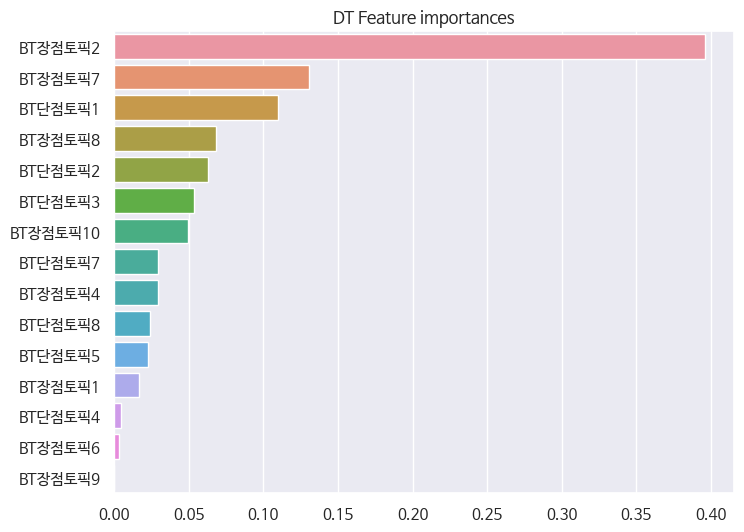



--------- Random Forest ---------
#Random Forest train set score: 0.999
#Random Forest test set score: 0.641


,0,variable name
1,0.064115,BT장점토픽2
10,0.063689,BT단점토픽1
12,0.061198,BT단점토픽3
11,0.058059,BT단점토픽2
17,0.056691,BT단점토픽8
0,0.056299,BT장점토픽1
9,0.056080,BT장점토픽10
14,0.055446,BT단점토픽5
16,0.055243,BT단점토픽7
6,0.054728,BT장점토픽7


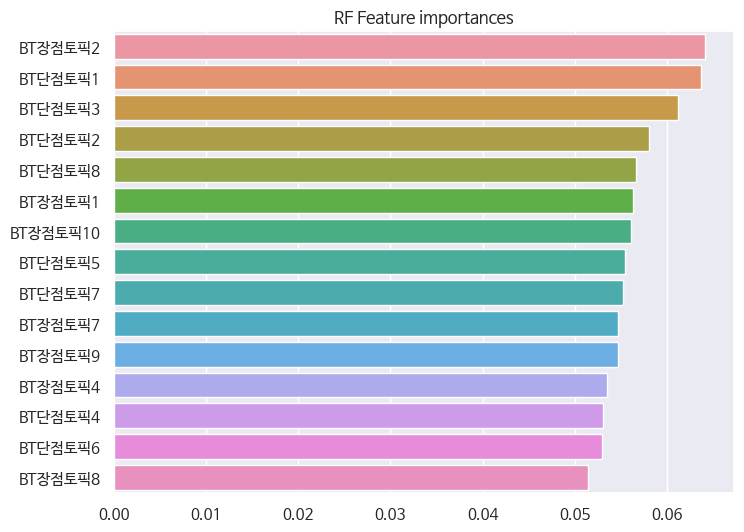



--------- Gradient Boosting ---------
#Gradient Boosting train set score: 0.658
#Gradient Boosting test set score: 0.652


,0,variable name
1,0.228529,BT장점토픽2
10,0.126111,BT단점토픽1
17,0.097247,BT단점토픽8
11,0.093345,BT단점토픽2
0,0.086625,BT장점토픽1
9,0.063458,BT장점토픽10
12,0.061603,BT단점토픽3
14,0.044387,BT단점토픽5
6,0.038985,BT장점토픽7
16,0.032285,BT단점토픽7


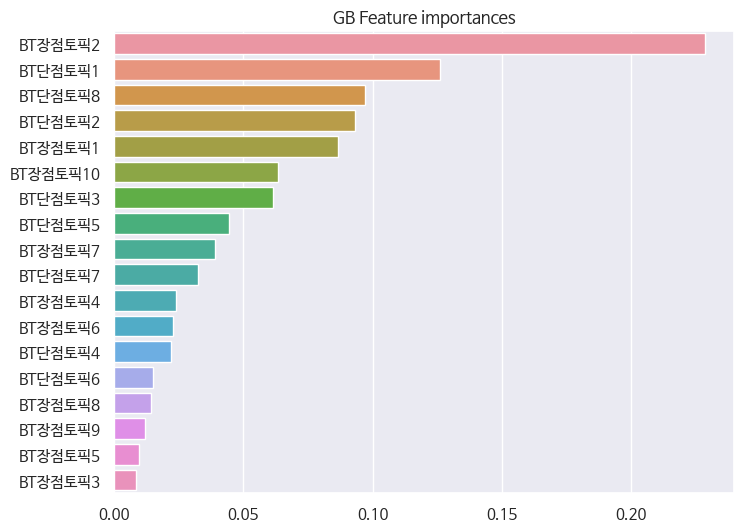

In [ ]:
X = df2[feature]
y = df2[response_var]

X_features = df2[feature]
y_target = y

print('\n\n--------- Decision Tree ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_model.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(dt_model.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(dt_model.score(X_test, y_test)))

#성능확인
result = dt_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('DT Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Random Forest ---------')
rf_best = RandomForestClassifier(random_state = 42)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_train)
print('#Random Forest train set score: {:.3f}'.format(rf_best.score(X_train, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_best.score(X_test, y_test)))

#cv=5 교차 검증
scores = cross_val_score(rf_best, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
result = rf_best.feature_importances_
res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('RF Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Gradient Boosting ---------')
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

#cv=5 교차 검증
scores = cross_val_score(gb_model, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
print('#Gradient Boosting train set score: {:.3f}'.format(gb_model.score(X_train, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb_model.score(X_test, y_test)))

# 특성 중요도 계산
result = gb_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('GB Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
name = pd.DataFrame(ftr_top20).index.to_list()
name.append(response_var)
name

['BT장점토픽2',
 'BT단점토픽1',
 'BT단점토픽8',
 'BT단점토픽2',
 'BT장점토픽1',
 'BT장점토픽10',
 'BT단점토픽3',
 'BT단점토픽5',
 'BT장점토픽7',
 'BT단점토픽7',
 'BT장점토픽4',
 'BT장점토픽6',
 'BT단점토픽4',
 'BT단점토픽6',
 'BT장점토픽8',
 'BT장점토픽9',
 'BT장점토픽5',
 'BT장점토픽3',
 '추천여부']

          BT장점토픽2  BT단점토픽1  BT단점토픽8  BT단점토픽2  BT장점토픽1  BT장점토픽10  BT단점토픽3  BT단점토픽5  BT장점토픽7  BT단점토픽7  BT장점토픽4  BT장점토픽6  BT단점토픽4  BT단점토픽6  BT장점토픽8  BT장점토픽9  BT장점토픽5  BT장점토픽3  추천여부
BT장점토픽2      1.00    -0.02     0.07    -0.03    -0.22     -0.16    -0.03    -0.00    -0.15     0.05    -0.16    -0.02    -0.00    -0.01    -0.09    -0.12    -0.08    -0.17 -0.11
BT단점토픽1     -0.02     1.00     0.10     0.21     0.00     -0.00     0.03     0.21     0.00     0.09    -0.00    -0.01    -0.33     0.02     0.02     0.00    -0.01     0.02 -0.04
BT단점토픽8      0.07     0.10     1.00     0.14    -0.04     -0.02     0.01     0.21    -0.01     0.24    -0.03     0.03    -0.47     0.08     0.02    -0.01    -0.01    -0.03 -0.00
BT단점토픽2     -0.03     0.21     0.14     1.00     0.02      0.00     0.08     0.27     0.01     0.12     0.01    -0.01    -0.39     0.05    -0.00     0.01     0.01    -0.01 -0.00
BT장점토픽1     -0.22     0.00    -0.04     0.02     1.00      0.05     0.02    -0.00     0.06    -0.03    -0.06  

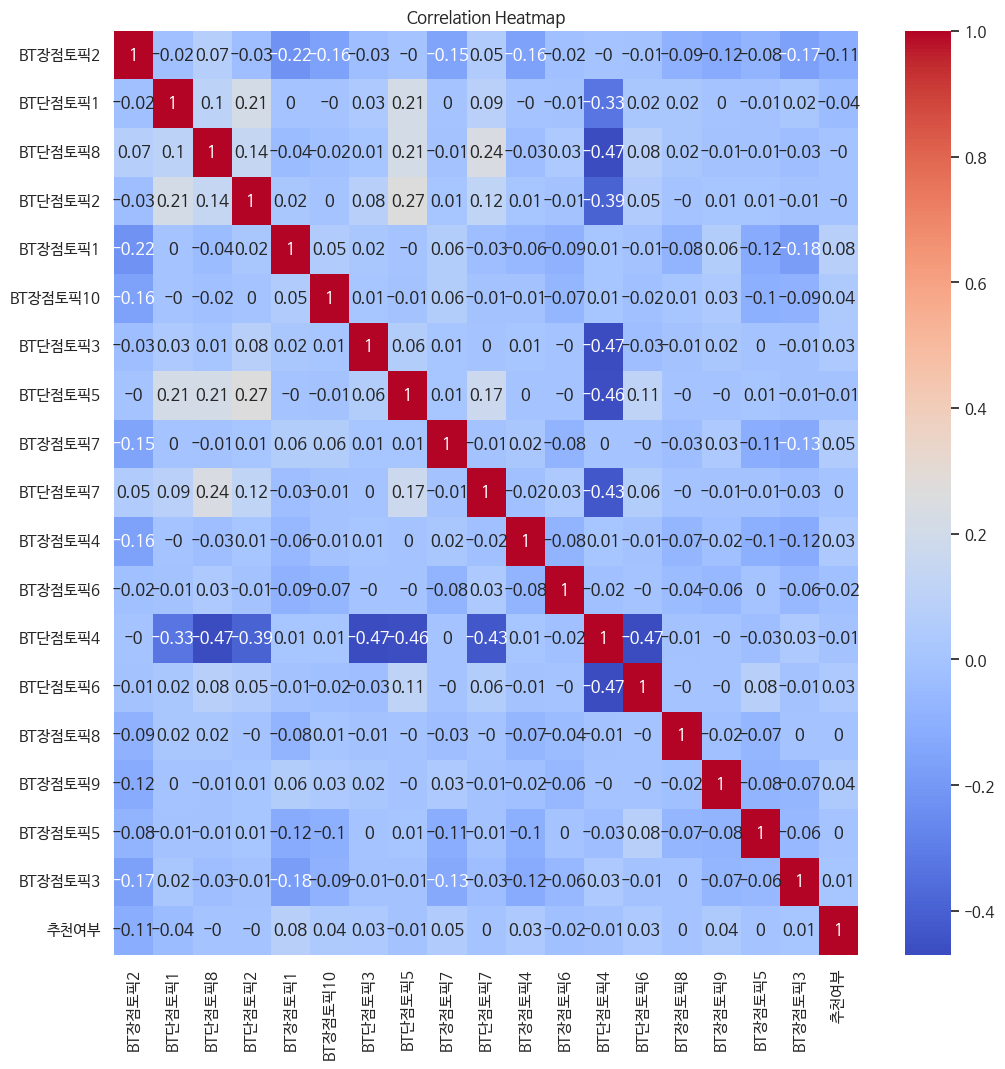

In [ ]:
# 데이터 생성
data = df2[name]
df_cor = pd.DataFrame(data)

# 상관관계 계산
correlation_matrix = df_cor.corr().round(2)

# 결과 출력
print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.yticks(rotation=0)
plt.show()

## IT산업

In [ ]:
feature = ['BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5', 'BT장점토픽6',
           'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10', 'BT단점토픽1', 'BT단점토픽2',
           'BT단점토픽3', 'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']

------------------------ 추천여부 -------------------------

--------- Ridge ---------
Train set score: 0.598
Test set score: 0.586
Max alpha 0.900 at max validation score 0.604
Train set score: 0.598
Test set score: 0.586
BT단점토픽6: 0.588276038905835
BT단점토픽7: 0.4922157304411153
BT장점토픽8: 0.42553569609768493
BT단점토픽3: 0.378022887888828
BT장점토픽1: 0.3710033934470809
BT단점토픽8: 0.35789246647701695
BT장점토픽9: 0.35126189045520545
BT단점토픽1: 0.30733730761773354
BT단점토픽5: 0.2922978728419631
BT장점토픽7: 0.19751771238089172
BT장점토픽5: 0.17488206021365554
BT장점토픽4: 0.1271315658612421
BT장점토픽10: 0.1167640176006866
BT단점토픽4: 0.07127263212856613
BT장점토픽3: 0.01473735263320726
BT장점토픽6: -0.17289328788195718
BT장점토픽2: -0.45028006000141574
BT단점토픽2: -1.1252870918608429

--------- Lasso  ---------
#Train set score: 0.597
#Test set score: 0.586
#Used features count: 15 out of 18


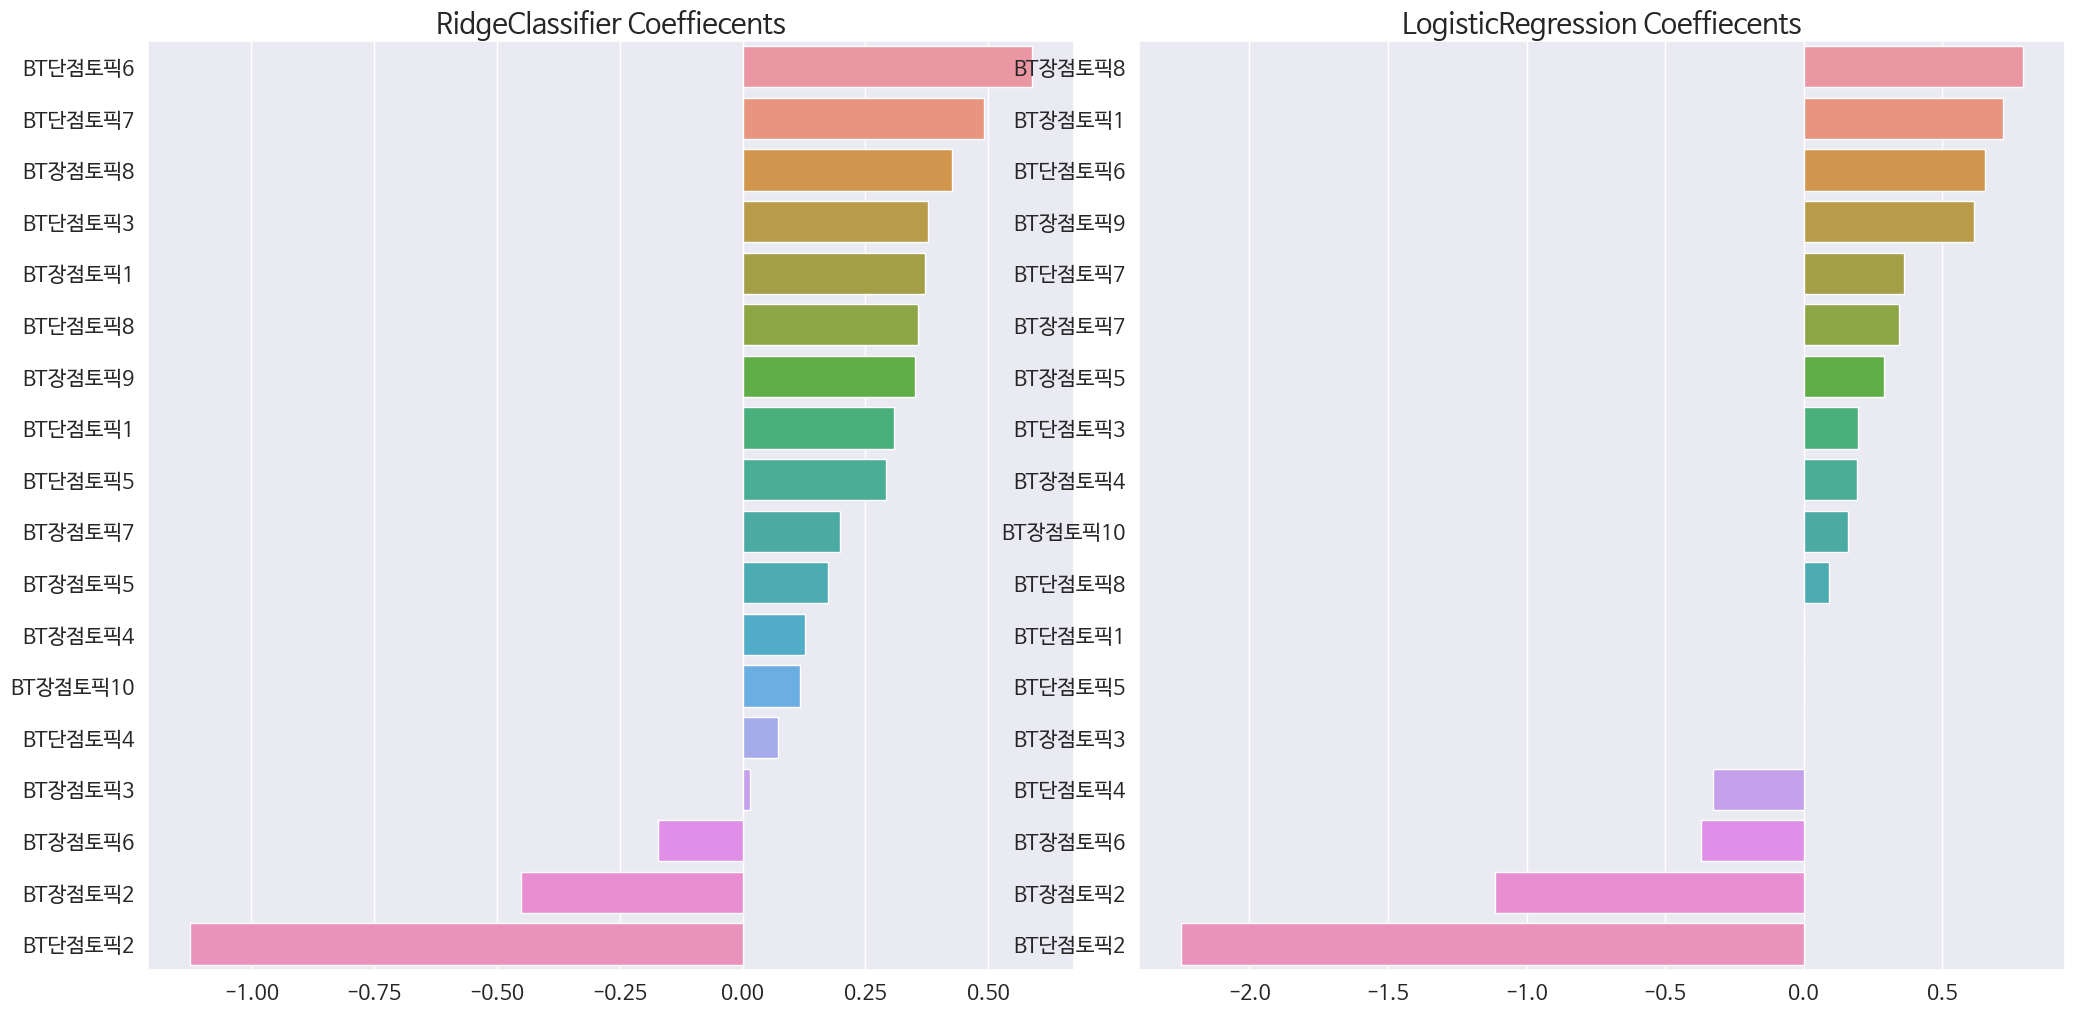

In [ ]:
response_var ='추천여부'
print(f'------------------------ {response_var} -------------------------')

X = df1[feature]
y = df1[response_var]

X_features = df1[feature]
y_target = y

print('\n--------- Ridge ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test, y_test)))

# 피처 중요도 및 정렬
feature_importances = ridge_clf.coef_
sorted_idx = np.argsort(feature_importances[0])[::-1]  # 중요도를 기준으로 내림차순으로 정렬한 인덱스

# 중요도가 높은 순서대로 출력
for idx in sorted_idx:
    feature_name = X_train.columns[idx]
    importance = feature_importances[0][idx]
    print(f"{feature_name}: {importance}")

print('\n--------- Lasso  ---------')
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train.shape[1])


# 모델의 회귀 계수 시각화.
models = [ridge_clf, lasso_clf]
visualize_coefficient(models)




--------- Decision Tree ---------
#Decision Tree train set score: 0.628
#Decision Tree test set score: 0.598


,0,variable name
1,0.353302,BT장점토픽2
0,0.113954,BT장점토픽1
7,0.084629,BT장점토픽8
17,0.067345,BT단점토픽8
11,0.050608,BT단점토픽2
10,0.047775,BT단점토픽1
15,0.042236,BT단점토픽6
5,0.041084,BT장점토픽6
8,0.039407,BT장점토픽9
12,0.039212,BT단점토픽3


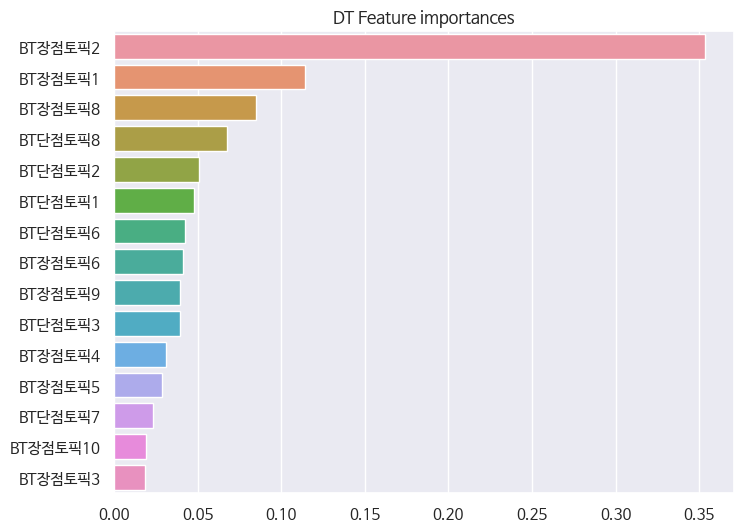



--------- Random Forest ---------
#Random Forest train set score: 0.999
#Random Forest test set score: 0.615


,0,variable name
1,0.066446,BT장점토픽2
12,0.060009,BT단점토픽3
0,0.059079,BT장점토픽1
10,0.058907,BT단점토픽1
11,0.058136,BT단점토픽2
8,0.057790,BT장점토픽9
6,0.056363,BT장점토픽7
9,0.055890,BT장점토픽10
17,0.055055,BT단점토픽8
3,0.054973,BT장점토픽4


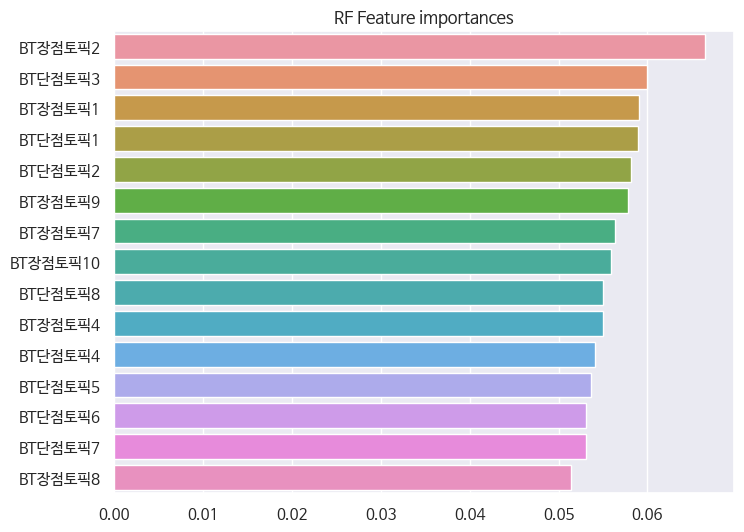



--------- Gradient Boosting ---------
#Gradient Boosting train set score: 0.679
#Gradient Boosting test set score: 0.618


,0,variable name
1,0.170054,BT장점토픽2
0,0.091867,BT장점토픽1
11,0.088466,BT단점토픽2
17,0.066359,BT단점토픽8
10,0.060208,BT단점토픽1
15,0.051901,BT단점토픽6
8,0.051823,BT장점토픽9
3,0.050008,BT장점토픽4
12,0.049692,BT단점토픽3
16,0.046819,BT단점토픽7


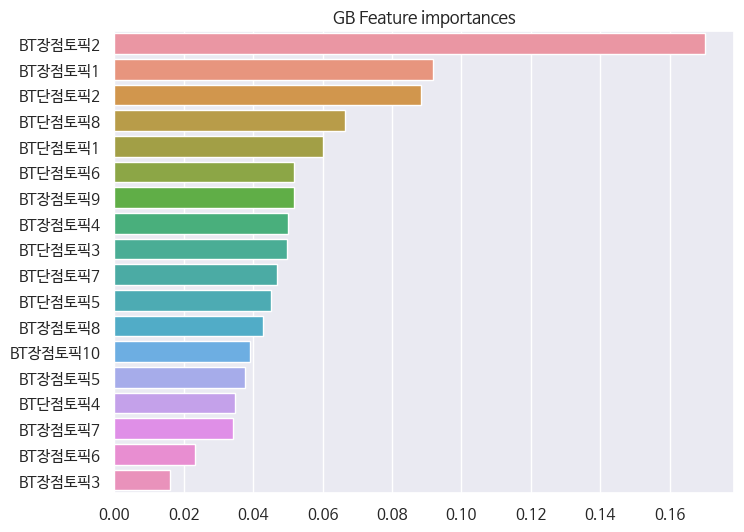

In [ ]:
X = df1[feature]
y = df1[response_var]

X_features = df1[feature]
y_target = y

print('\n\n--------- Decision Tree ---------')
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_model.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(dt_model.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(dt_model.score(X_test, y_test)))

#성능확인
result = dt_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('DT Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Random Forest ---------')
rf_best = RandomForestClassifier(random_state = 42)
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_train)
print('#Random Forest train set score: {:.3f}'.format(rf_best.score(X_train, y_train)))
print('#Random Forest test set score: {:.3f}'.format(rf_best.score(X_test, y_test)))

#cv=5 교차 검증
scores = cross_val_score(rf_best, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
result = rf_best.feature_importances_
res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('RF Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

print('\n\n--------- Gradient Boosting ---------')
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

#cv=5 교차 검증
scores = cross_val_score(gb_model, X_train, y_train, cv=5, n_jobs=-1,
                          scoring = 'neg_mean_squared_error')

#성능확인
print('#Gradient Boosting train set score: {:.3f}'.format(gb_model.score(X_train, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb_model.score(X_test, y_test)))

# 특성 중요도 계산
result = gb_model.feature_importances_

res = pd.DataFrame(result)
res['variable name'] = feature
display(res.sort_values(by=0, ascending=False).head(20))

%matplotlib inline
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('GB Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
name = pd.DataFrame(ftr_top20).index.to_list()
name.append(response_var)
name

['BT장점토픽2',
 'BT장점토픽1',
 'BT단점토픽2',
 'BT단점토픽8',
 'BT단점토픽1',
 'BT단점토픽6',
 'BT장점토픽9',
 'BT장점토픽4',
 'BT단점토픽3',
 'BT단점토픽7',
 'BT단점토픽5',
 'BT장점토픽8',
 'BT장점토픽10',
 'BT장점토픽5',
 'BT단점토픽4',
 'BT장점토픽7',
 'BT장점토픽6',
 'BT장점토픽3',
 '추천여부']

          BT장점토픽2  BT장점토픽1  BT단점토픽2  BT단점토픽8  BT단점토픽1  BT단점토픽6  BT장점토픽9  BT장점토픽4  BT단점토픽3  BT단점토픽7  BT단점토픽5  BT장점토픽8  BT장점토픽10  BT장점토픽5  BT단점토픽4  BT장점토픽7  BT장점토픽6  BT장점토픽3  추천여부
BT장점토픽2      1.00    -0.22    -0.04     0.09    -0.02    -0.00    -0.12    -0.17    -0.02     0.06    -0.00    -0.08     -0.15    -0.06    -0.02    -0.16    -0.02    -0.14 -0.12
BT장점토픽1     -0.22     1.00     0.03    -0.04    -0.00    -0.01     0.08    -0.08     0.02    -0.03     0.01    -0.08      0.05    -0.10     0.02    -0.03    -0.10    -0.17  0.09
BT단점토픽2     -0.04     0.03     1.00     0.25     0.47     0.19     0.00     0.02     0.32     0.27     0.62     0.00      0.01    -0.02    -0.60     0.03    -0.01    -0.00 -0.00
BT단점토픽8      0.09    -0.04     0.25     1.00     0.14     0.13    -0.02    -0.02     0.06     0.28     0.26     0.00     -0.01    -0.02    -0.54    -0.01     0.03    -0.03  0.00
BT단점토픽1     -0.02    -0.00     0.47     0.14     1.00     0.09     0.00     0.01     0.14     0.15     0.34   

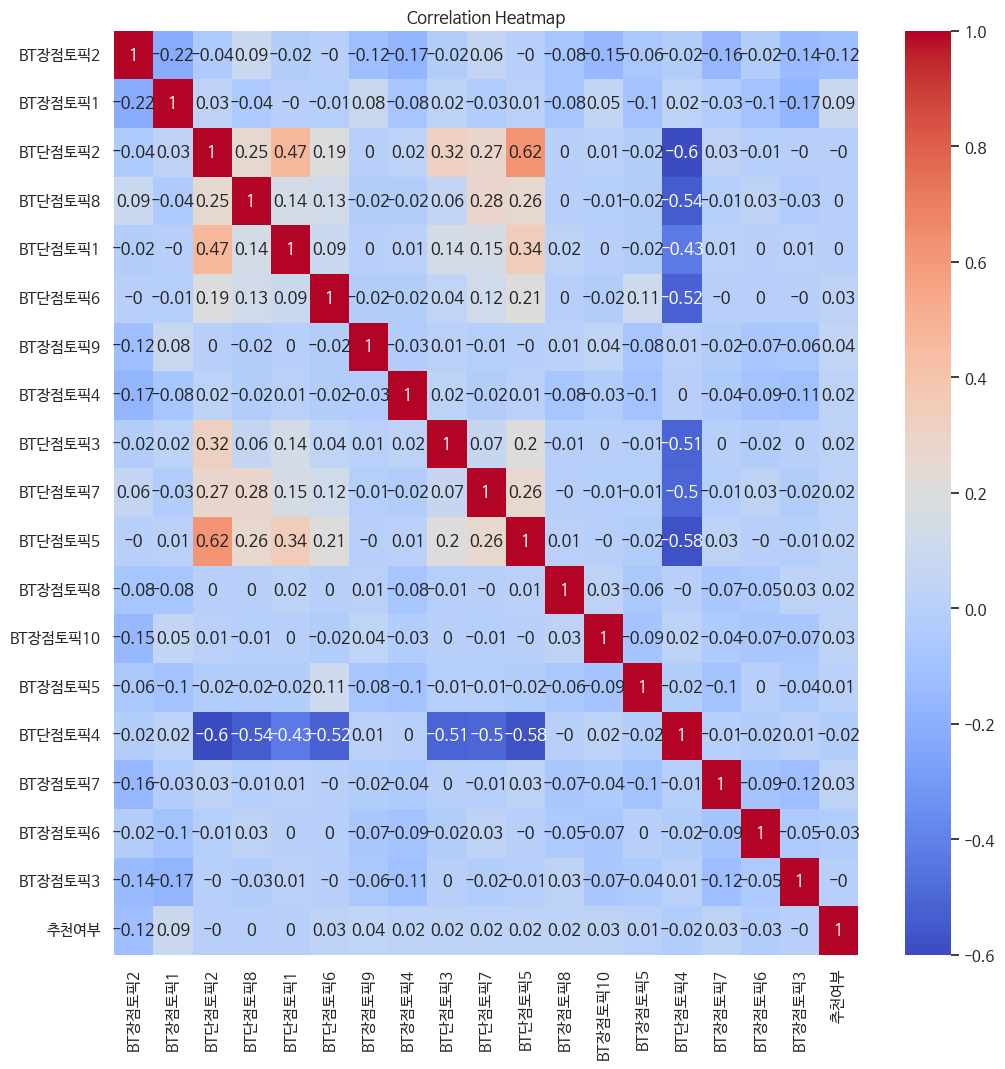

In [ ]:
# 데이터 생성
data = df1[name]
df_cor = pd.DataFrame(data)

# 상관관계 계산
correlation_matrix = df_cor.corr().round(2)

# 결과 출력
print(correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.yticks(rotation=0)
plt.show()

#  회귀분석(최종분석)

In [ ]:
import statsmodels.api as sm
from collections import Counter

## 전체산업

In [ ]:
X = df2[['직무2','지역2']]
y = df2['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.651405
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                70263
Model:                          Logit   Df Residuals:                    70260
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                0.001039
Time:                        10:20:48   Log-Likelihood:                -45770.
converged:                       True   LL-Null:                       -45817.
Covariance Type:            nonrobust   LLR p-value:                 2.106e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5008      0.017    -30.167      0.000      -0.533      -0.468
직무2            0.1999      0.

In [ ]:
X = df2[['직무2','지역2','BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5', 'BT장점토픽6',
         'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10', 'BT단점토픽1', 'BT단점토픽2','BT단점토픽3',
         'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']]
y = df2['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.639780
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                70263
Model:                          Logit   Df Residuals:                    70242
Method:                           MLE   Df Model:                           20
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                 0.01887
Time:                        10:20:50   Log-Likelihood:                -44953.
converged:                       True   LL-Null:                       -45817.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1099      0.111     -9.964      0.000      -1.328      -0.892
직무2            0.1935      0.

In [ ]:
X = df2[['직무2','지역2','BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5','BT장점토픽6',
           'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9','BT장점토픽10']]
y = df2['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.641741
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                70263
Model:                          Logit   Df Residuals:                    70250
Method:                           MLE   Df Model:                           12
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                 0.01586
Time:                        10:20:50   Log-Likelihood:                -45091.
converged:                       True   LL-Null:                       -45817.
Covariance Type:            nonrobust   LLR p-value:                4.373e-304
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6886      0.031    -22.256      0.000      -0.749      -0.628
직무2            0.1964      0.

In [ ]:
X = df2[['직무2','지역2', 'BT단점토픽1', 'BT단점토픽2','BT단점토픽3',
         'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']]
y = df2['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.649629
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                70263
Model:                          Logit   Df Residuals:                    70252
Method:                           MLE   Df Model:                           10
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                0.003763
Time:                        10:20:51   Log-Likelihood:                -45645.
converged:                       True   LL-Null:                       -45817.
Covariance Type:            nonrobust   LLR p-value:                 5.078e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8741      0.107     -8.147      0.000      -1.084      -0.664
직무2            0.1967      0.

In [ ]:
from statsmodels.regression.mixed_linear_model import MixedLM

In [ ]:
formula = '추천여부 ~ BT장점토픽1+BT장점토픽2+BT장점토픽3+BT장점토픽4+BT장점토픽5+BT장점토픽6+BT장점토픽7+BT장점토픽8+BT장점토픽9+BT장점토픽10'  # 회귀식 설정
groups = '기업이름'  # 계층 정보를 담고 있는 열 지정

# MixedLM 모델 생성
model = MixedLM.from_formula(formula, data=df2, groups=df2[groups])

# 모델 학습
results = model.fit()

# 결과 출력
print(results.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: 추천여부       
No. Observations: 70263   Method:             REML       
No. Groups:       802     Scale:              0.1897     
Min. group size:  8       Log-Likelihood:     -42362.1160
Max. group size:  1149    Converged:          Yes        
Mean group size:  87.6                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      0.297    0.009  34.669 0.000  0.280  0.313
BT장점토픽1        0.137    0.010  13.928 0.000  0.118  0.156
BT장점토픽2       -0.128    0.010 -13.363 0.000 -0.147 -0.109
BT장점토픽3        0.038    0.010   3.779 0.000  0.018  0.057
BT장점토픽4        0.102    0.015   6.806 0.000  0.073  0.132
BT장점토픽5        0.015    0.015   0.978 0.328 -0.015  0.045
BT장점토픽6       -0.034    0.021  -1.591 0.112 -0.076  0.008
BT장점토픽7        0.095    

In [ ]:
formula = '추천여부 ~ BT단점토픽1+BT단점토픽2+BT단점토픽3+BT단점토픽4+BT단점토픽5+BT단점토픽6+BT단점토픽7+BT단점토픽8'  # 회귀식 설정
groups = '기업이름'  # 계층 정보를 담고 있는 열 지정

# MixedLM 모델 생성
model = MixedLM.from_formula(formula, data=df2, groups=df2[groups])

# 모델 학습
results = model.fit()

# 결과 출력
print(results.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: 추천여부       
No. Observations: 70263   Method:             REML       
No. Groups:       802     Scale:              0.1916     
Min. group size:  8       Log-Likelihood:     -42706.4754
Max. group size:  1149    Converged:          Yes        
Mean group size:  87.6                                   
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   0.273     0.023  11.965  0.000   0.229   0.318
BT단점토픽1    -0.269     0.043  -6.270  0.000  -0.353  -0.185
BT단점토픽2     0.016     0.042   0.368  0.713  -0.067   0.098
BT단점토픽3     0.193     0.031   6.305  0.000   0.133   0.253
BT단점토픽4     0.062     0.022   2.834  0.005   0.019   0.105
BT단점토픽5     0.009     0.044   0.197  0.844  -0.078   0.095
BT단점토픽6     0.151     0.032   4.776  0.000   0.089   0.213
BT단점토픽7     0.

## IT산업

In [ ]:
X = df1[['직무2','지역2']]
y = df1['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.673880
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                10955
Model:                          Logit   Df Residuals:                    10952
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:               0.0007074
Time:                        10:21:07   Log-Likelihood:                -7382.4
converged:                       True   LL-Null:                       -7387.6
Covariance Type:            nonrobust   LLR p-value:                  0.005376
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6041      0.078     -7.700      0.000      -0.758      -0.450
직무2            0.0834      0.

In [ ]:
X = df1[['직무2','지역2','BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5', 'BT장점토픽6',
         'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9', 'BT장점토픽10', 'BT단점토픽1', 'BT단점토픽2','BT단점토픽3',
         'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']]
y = df1['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.660933
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                10955
Model:                          Logit   Df Residuals:                    10934
Method:                           MLE   Df Model:                           20
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                 0.01991
Time:                        10:21:08   Log-Likelihood:                -7240.5
converged:                       True   LL-Null:                       -7387.6
Covariance Type:            nonrobust   LLR p-value:                 1.270e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4963      0.350     -4.278      0.000      -2.182      -0.811
직무2            0.0750      0.

In [ ]:
X = df1[['직무2','지역2','BT장점토픽1', 'BT장점토픽2', 'BT장점토픽3', 'BT장점토픽4', 'BT장점토픽5','BT장점토픽6',
           'BT장점토픽7', 'BT장점토픽8', 'BT장점토픽9','BT장점토픽10']]
y = df1['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.662823
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                10955
Model:                          Logit   Df Residuals:                    10942
Method:                           MLE   Df Model:                           12
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                 0.01710
Time:                        10:21:08   Log-Likelihood:                -7261.2
converged:                       True   LL-Null:                       -7387.6
Covariance Type:            nonrobust   LLR p-value:                 3.728e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7453      0.104     -7.196      0.000      -0.948      -0.542
직무2            0.0716      0.

In [ ]:
X = df1[['직무2','지역2', 'BT단점토픽1', 'BT단점토픽2','BT단점토픽3',
         'BT단점토픽4', 'BT단점토픽5', 'BT단점토픽6', 'BT단점토픽7', 'BT단점토픽8']]
y = df1['추천여부']

logit_model = sm.Logit(y, sm.add_constant(X))  # 로지스틱 회귀모델 생성
result = logit_model.fit()  # 모델 학습
print(result.summary())  # 결과 요약 출력

Optimization terminated successfully.
         Current function value: 0.672467
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   추천여부   No. Observations:                10955
Model:                          Logit   Df Residuals:                    10944
Method:                           MLE   Df Model:                           10
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                0.002804
Time:                        10:21:08   Log-Likelihood:                -7366.9
converged:                       True   LL-Null:                       -7387.6
Covariance Type:            nonrobust   LLR p-value:                 9.498e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3142      0.338     -3.884      0.000      -1.977      -0.651
직무2            0.0854      0.

In [ ]:
from statsmodels.regression.mixed_linear_model import MixedLM

In [ ]:
formula = '추천여부 ~ BT장점토픽1+BT장점토픽2+BT장점토픽3+BT장점토픽4+BT장점토픽5+BT장점토픽6+BT장점토픽7+BT장점토픽8+BT장점토픽9+BT장점토픽10'  # 회귀식 설정
groups = '기업이름'  # 계층 정보를 담고 있는 열 지정

# MixedLM 모델 생성
model = MixedLM.from_formula(formula, data=df1, groups=df1[groups])

# 모델 학습
results = model.fit()

# 결과 출력
print(results.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: 추천여부      
No. Observations: 10955   Method:             REML      
No. Groups:       126     Scale:              0.1947    
Min. group size:  12      Log-Likelihood:     -6767.8776
Max. group size:  534     Converged:          Yes       
Mean group size:  86.9                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.343    0.023 15.138 0.000  0.299  0.388
BT장점토픽1        0.171    0.026  6.702 0.000  0.121  0.221
BT장점토픽2       -0.138    0.026 -5.381 0.000 -0.188 -0.088
BT장점토픽3        0.012    0.028  0.433 0.665 -0.043  0.067
BT장점토픽4        0.104    0.036  2.860 0.004  0.033  0.175
BT장점토픽5        0.077    0.043  1.790 0.073 -0.007  0.162
BT장점토픽6       -0.104    0.051 -2.020 0.043 -0.205 -0.003
BT장점토픽7        0.030    0.038  0.779 0.43

In [ ]:
formula = '추천여부 ~ BT단점토픽1+BT단점토픽2+BT단점토픽3+BT단점토픽4+BT단점토픽5+BT단점토픽6+BT단점토픽7+BT단점토픽8'  # 회귀식 설정
groups = '기업이름'  # 계층 정보를 담고 있는 열 지정

# MixedLM 모델 생성
model = MixedLM.from_formula(formula, data=df1, groups=df1[groups])

# 모델 학습
results = model.fit()

# 결과 출력
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: 추천여부      
No. Observations: 10955   Method:             REML      
No. Groups:       126     Scale:              0.1965    
Min. group size:  12      Log-Likelihood:     -6817.7813
Max. group size:  534     Converged:          No        
Mean group size:  86.9                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.259    0.072  3.589 0.000  0.117  0.400
BT단점토픽1        0.246    0.148  1.657 0.097 -0.045  0.536
BT단점토픽2       -0.507    0.213 -2.385 0.017 -0.924 -0.090
BT단점토픽3        0.257    0.103  2.480 0.013  0.054  0.459
BT단점토픽4        0.101    0.070  1.446 0.148 -0.036  0.238
BT단점토픽5        0.202    0.164  1.236 0.216 -0.118  0.523
BT단점토픽6        0.300    0.104  2.881 0.004  0.096  0.504
BT단점토픽7        0.327    0.132  2.476 0.01

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 35.143691
  warnings.warn(msg, ConvergenceWarning)


# (E.O.F)